In [3]:
conda install gcc

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - gcc

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [1]:
conda install -c conda-forge fbprophet

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cctools-895                |                1         1.9 MB  conda-forge
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    clang-4.0.1                |                1        73.9 MB  conda-forge
    clang_osx-64-4.0.1         |      h1ce6c1d_17         145 KB  conda-forge
    clangxx-4.0.1              |                1         263 KB  conda-forge
    clangxx_osx-64-4.0.1       |      h22b1bf0_17         146 KB  conda-forge
    conda-4.9.2                |   py37hf985489_0         3.0 MB 

In [1]:
! pip install pystan

In [2]:
!pip install fbprophet

NO HIGH FREQUENCY DATA . Only daily data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import math
import pandas.util.testing as tm
from sklearn import linear_model
from sklearn.metrics import r2_score
from pandas import DatetimeIndex
from datetime import datetime
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [71]:
df_xrp_main = pd.read_csv('XRP-USD.csv')

In [4]:
df_xrp_orig.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-23,0.004269,0.004351,0.004237,0.004288,0.004288,314451
1,2015-11-24,0.004288,0.004288,0.004201,0.004242,0.004242,197940
2,2015-11-25,0.004242,0.004325,0.004228,0.004318,0.004318,197356
3,2015-11-26,0.004317,0.004435,0.004227,0.004291,0.004291,400520
4,2015-11-27,0.004276,0.004304,0.004229,0.004276,0.004276,199790


In [27]:
df_xrp.shape

(1828, 7)

In [69]:
df_btc_main = pd.read_csv('BTC-USD.csv')

In [6]:
df_btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-23,324.350006,325.118011,321.290009,323.045990,323.045990,27478900
1,2015-11-24,323.014008,323.058014,318.118011,320.045990,320.045990,29362600
2,2015-11-25,320.045013,329.134003,316.769989,328.205994,328.205994,41666900
3,2015-11-26,328.303009,366.756989,328.229004,352.683990,352.683990,106105000
4,2015-11-27,351.860992,363.588989,347.869995,358.041992,358.041992,55179100


In [29]:
df_btc.shape

(1828, 7)

In [70]:
df_eth_main = pd.read_csv('ETH-USD.csv')

In [30]:
df_eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-24,0.946442,0.948055,0.895931,0.900191,0.900191,524195
1,2015-11-25,0.893827,0.899493,0.851106,0.863537,0.863537,622991
2,2015-11-26,0.863273,0.903643,0.804360,0.884183,0.884183,947473
3,2015-11-27,0.882100,0.900051,0.860695,0.867951,0.867951,403813
4,2015-11-28,0.868102,0.929293,0.862122,0.915703,0.915703,462464


In [31]:
df_eth.shape

(1828, 7)

In [72]:
df_btc_cash_main = pd.read_csv('BCH-USD.csv')

In [32]:
df_btc_cash.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-23,555.885986,578.971008,411.776001,413.059998,413.059998,85013
1,2017-07-24,412.579987,578.892029,409.210999,440.700989,440.700989,190952
2,2017-07-25,441.345001,541.658020,338.091003,406.897003,406.897003,524908
3,2017-07-26,407.082001,486.158997,321.791992,365.816010,365.816010,1784640
4,2017-07-27,417.097992,460.968994,367.777008,385.479004,385.479004,533207


In [33]:
df_btc_cash.shape

(1221, 7)

In [73]:
df_link_main = pd.read_csv('LINK-USD.csv')

In [34]:
df_link.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-20,0.156494,0.189448,0.152489,0.189165,0.189165,2718640
1,2017-09-21,0.189132,0.207892,0.155292,0.169680,0.169680,2126270
2,2017-09-22,0.169826,0.181675,0.139869,0.150503,0.150503,1423220
3,2017-09-23,0.149562,0.157440,0.126297,0.131129,0.131129,1186670
4,2017-09-24,0.131110,0.190250,0.130275,0.170278,0.170278,1025740


In [35]:
df_link.shape

(1162, 7)

In [10]:
df_binance = pd.read_csv('BNB-USD.csv')

In [17]:
df_binance.shape

(1218, 7)

In [18]:
df_binance.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1.218000e+03
mean,15.047967,15.537083,14.525292,15.068713,15.068713,1.813308e+08
std,8.616116,8.820203,8.395894,8.616971,8.616971,1.617170e+08
min,0.099721,0.101211,0.096109,0.099867,0.099867,9.284000e+03
25%,9.524122,9.769015,9.229625,9.531628,9.531628,4.008525e+07
50%,14.634150,15.169550,14.125620,14.653100,14.653100,1.527490e+08
75%,20.392702,20.920997,19.839625,20.457458,20.457458,2.688812e+08
max,38.812336,39.566536,37.544617,38.815918,38.815918,1.144638e+09


In [36]:
df_xrp['Avg_Price'] = (2 * df_xrp['Close'] + df_xrp['High'] + df_xrp['Low']) / 4

In [37]:
df_btc['Avg_Price'] = (2 * df_btc['Close'] + df_btc['High'] + df_btc['Low']) / 4

In [38]:
df_eth['Avg_Price'] = (2 * df_eth['Close'] + df_eth['High'] + df_eth['Low']) / 4

In [39]:
df_btc_cash['Avg_Price'] = (2 * df_btc_cash['Close'] + df_btc_cash['High'] + df_btc_cash['Low']) / 4

In [40]:
df_link['Avg_Price'] = (2 * df_link['Close'] + df_link['High'] + df_link['Low']) / 4

In [4]:
df_ripple.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Avg_Price
0,2015-11-23,0.004269,0.004351,0.004237,0.004288,0.004288,314451,0.004291
1,2015-11-24,0.004288,0.004288,0.004201,0.004242,0.004242,197940,0.004243
2,2015-11-25,0.004242,0.004325,0.004228,0.004318,0.004318,197356,0.004297
3,2015-11-26,0.004317,0.004435,0.004227,0.004291,0.004291,400520,0.004311
4,2015-11-27,0.004276,0.004304,0.004229,0.004276,0.004276,199790,0.004271
5,2015-11-28,0.004275,0.004275,0.004208,0.004238,0.004238,195480,0.004240
6,2015-11-29,0.004243,0.004299,0.004234,0.004299,0.004299,197822,0.004283
7,2015-11-30,0.004298,0.004322,0.004185,0.004201,0.004201,272695,0.004227
8,2015-12-01,0.004202,0.004208,0.004054,0.004090,0.004090,312401,0.004110
9,2015-12-02,0.004091,0.004189,0.004041,0.004173,0.004173,328403,0.004144


In [41]:
df_xrp_close = df_xrp.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_xrp_close

,Date,Close
0,2015-11-23,0.004288
1,2015-11-24,0.004242
2,2015-11-25,0.004318
3,2015-11-26,0.004291
4,2015-11-27,0.004276
...,...,...
1823,2020-11-19,0.303766
1824,2020-11-20,0.328068
1825,2020-11-21,0.458344
1826,2020-11-22,0.443700


In [42]:
df_btc_close = df_btc.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_btc_close

,Date,Close
0,2015-11-23,323.045990
1,2015-11-24,320.045990
2,2015-11-25,328.205994
3,2015-11-26,352.683990
4,2015-11-27,358.041992
...,...,...
1823,2020-11-19,17817.089844
1824,2020-11-20,18621.314453
1825,2020-11-21,18642.232422
1826,2020-11-22,18370.001953


In [43]:
df_eth_close = df_eth.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_eth_close

,Date,Close
0,2015-11-24,0.900191
1,2015-11-25,0.863537
2,2015-11-26,0.884183
3,2015-11-27,0.867951
4,2015-11-28,0.915703
...,...,...
1823,2020-11-20,509.744568
1824,2020-11-21,549.486633
1825,2020-11-22,558.068115
1826,2020-11-23,608.454041


In [44]:
df_btc_cash_close = df_btc_cash.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_btc_cash_close

,Date,Close
0,2017-07-23,413.059998
1,2017-07-24,440.700989
2,2017-07-25,406.897003
3,2017-07-26,365.816010
4,2017-07-27,385.479004
...,...,...
1216,2020-11-20,258.854919
1217,2020-11-21,301.924805
1218,2020-11-22,286.993408
1219,2020-11-23,323.025818


In [45]:
df_link_close = df_link.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_link_close

,Date,Close
0,2017-09-20,0.189165
1,2017-09-21,0.169680
2,2017-09-22,0.150503
3,2017-09-23,0.131129
4,2017-09-24,0.170278
...,...,...
1157,2020-11-20,14.078273
1158,2020-11-21,15.355934
1159,2020-11-22,14.444801
1160,2020-11-23,15.270844


In [46]:
df_xrp_close['Date'] = pd.to_datetime(df_xrp_close['Date'])

In [47]:
df_btc_close['Date'] = pd.to_datetime(df_btc_close['Date'])

In [48]:
df_eth_close['Date'] = pd.to_datetime(df_eth_close['Date'])

In [49]:
df_btc_cash_close['Date'] = pd.to_datetime(df_btc_cash_close['Date'])

In [50]:
df_link_close['Date'] = pd.to_datetime(df_link_close['Date'])

In [59]:
df_xrp_close.columns = ['ds', 'y']
df_btc_close.columns = ['ds', 'y']
df_eth_close.columns = ['ds', 'y']
df_btc_cash_close.columns = ['ds', 'y']
df_link_close.columns = ['ds', 'y']

In [60]:
prophet_model_xrp = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_model_xrp.add_country_holidays(country_name='US')
prophet_model_xrp.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [61]:
prophet_model_btc = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_model_btc.add_country_holidays(country_name='US')
prophet_model_btc.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [62]:
prophet_model_eth = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_model_eth.add_country_holidays(country_name='US')
prophet_model_eth.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [63]:
prophet_model_btc_cash = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_model_btc_cash.add_country_holidays(country_name='US')
prophet_model_btc_cash.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [64]:
prophet_model_link = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_model_link.add_country_holidays(country_name='US')
prophet_model_link.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [65]:
prophet_model_xrp.fit(df_xrp_close)
prophet_model_btc.fit(df_btc_close)
prophet_model_eth.fit(df_eth_close)
prophet_model_btc_cash.fit(df_btc_cash_close)
prophet_model_link.fit(df_link_close)

In [66]:
future_xrp = prophet_model_xrp.make_future_dataframe(periods=30)
future_xrp.tail()

,ds
1853,2020-12-19
1854,2020-12-20
1855,2020-12-21
1856,2020-12-22
1857,2020-12-23


In [67]:
future_btc = prophet_model_btc.make_future_dataframe(periods=30)
future_btc.tail()

,ds
1853,2020-12-19
1854,2020-12-20
1855,2020-12-21
1856,2020-12-22
1857,2020-12-23


In [68]:
future_eth = prophet_model_eth.make_future_dataframe(periods=30)


In [69]:
future_btc_cash = prophet_model_btc_cash.make_future_dataframe(periods=30)


In [70]:
future_link = prophet_model_link.make_future_dataframe(periods=30)


In [71]:
forecast_xrp = prophet_model_xrp.predict(future_xrp)


In [72]:
forecast_btc = prophet_model_btc.predict(future_btc)

In [73]:
forecast_eth = prophet_model_eth.predict(future_eth)

In [74]:
forecast_btc_cash = prophet_model_btc_cash.predict(future_btc_cash)

In [75]:
forecast_link = prophet_model_link.predict(future_link)

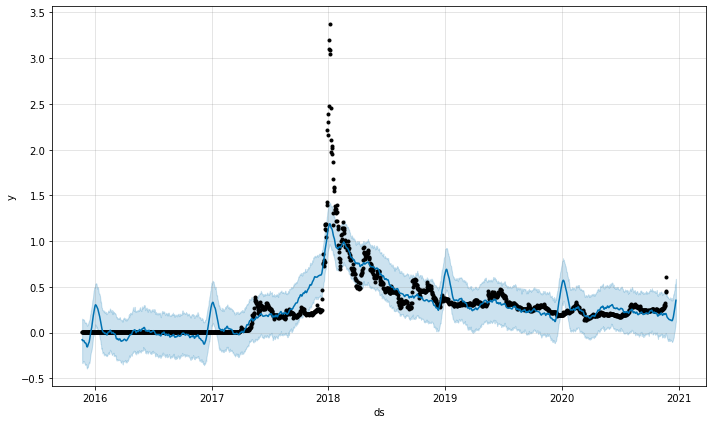

In [76]:
prophet_model_xrp.plot(forecast_xrp);

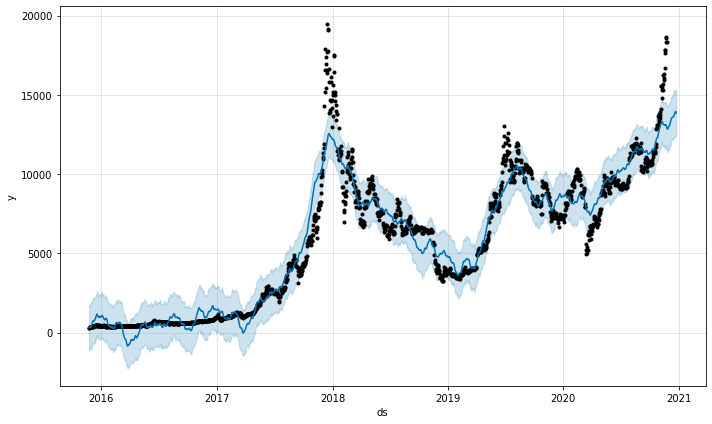

In [77]:
prophet_model_btc.plot(forecast_btc);

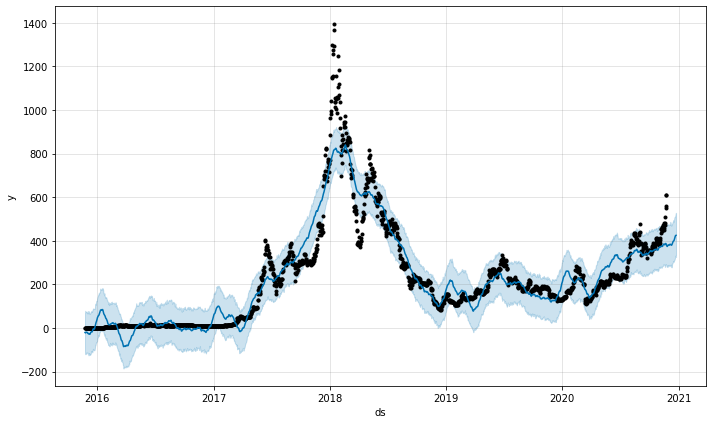

In [78]:
prophet_model_eth.plot(forecast_eth);

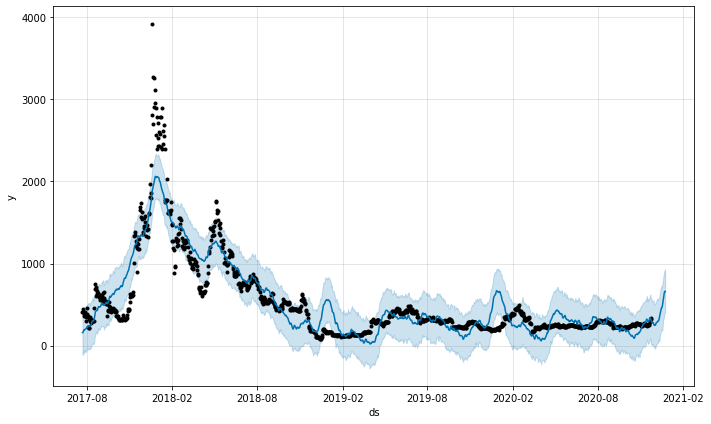

In [79]:
prophet_model_btc_cash.plot(forecast_btc_cash);

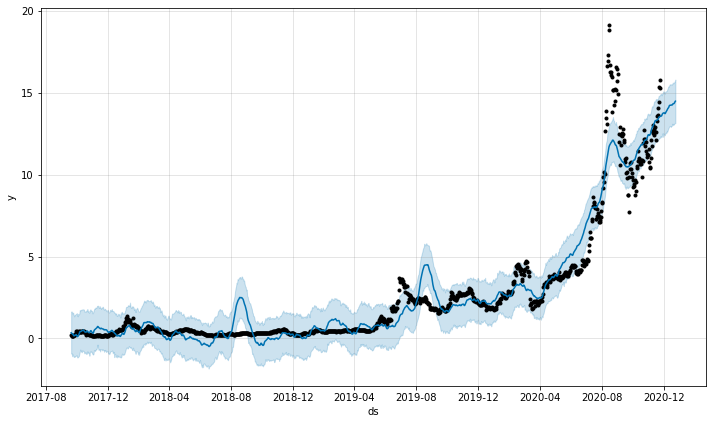

In [80]:
prophet_model_link.plot(forecast_link);

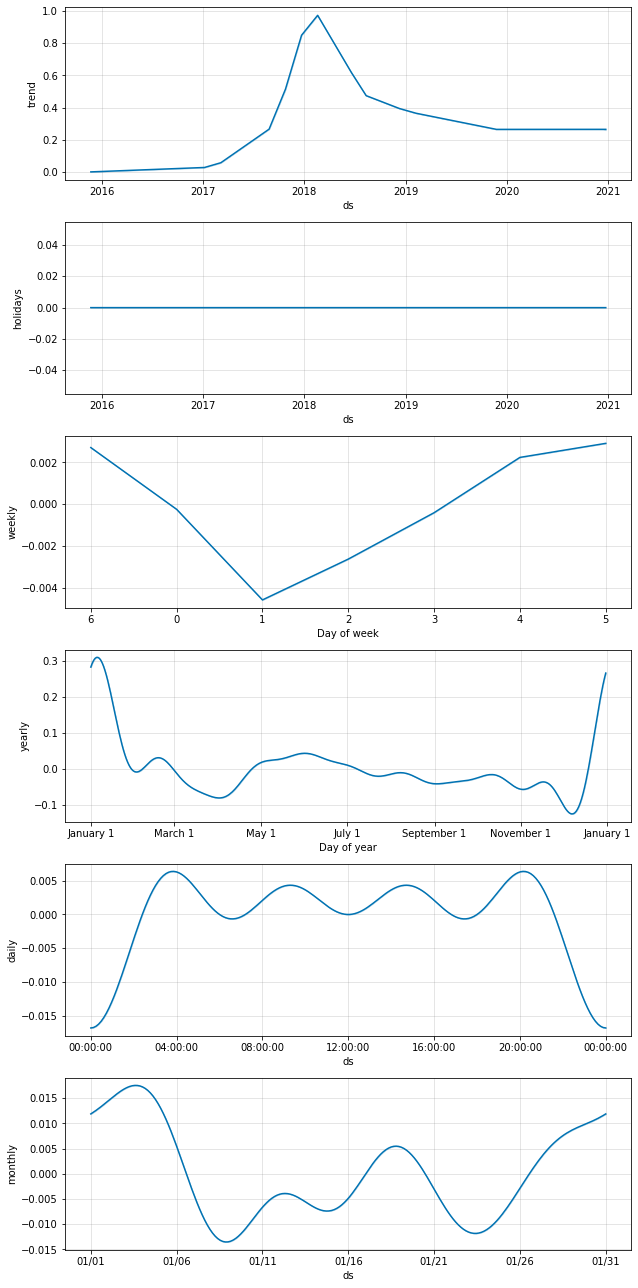

In [82]:

prophet_model_xrp.plot_components(forecast_xrp);

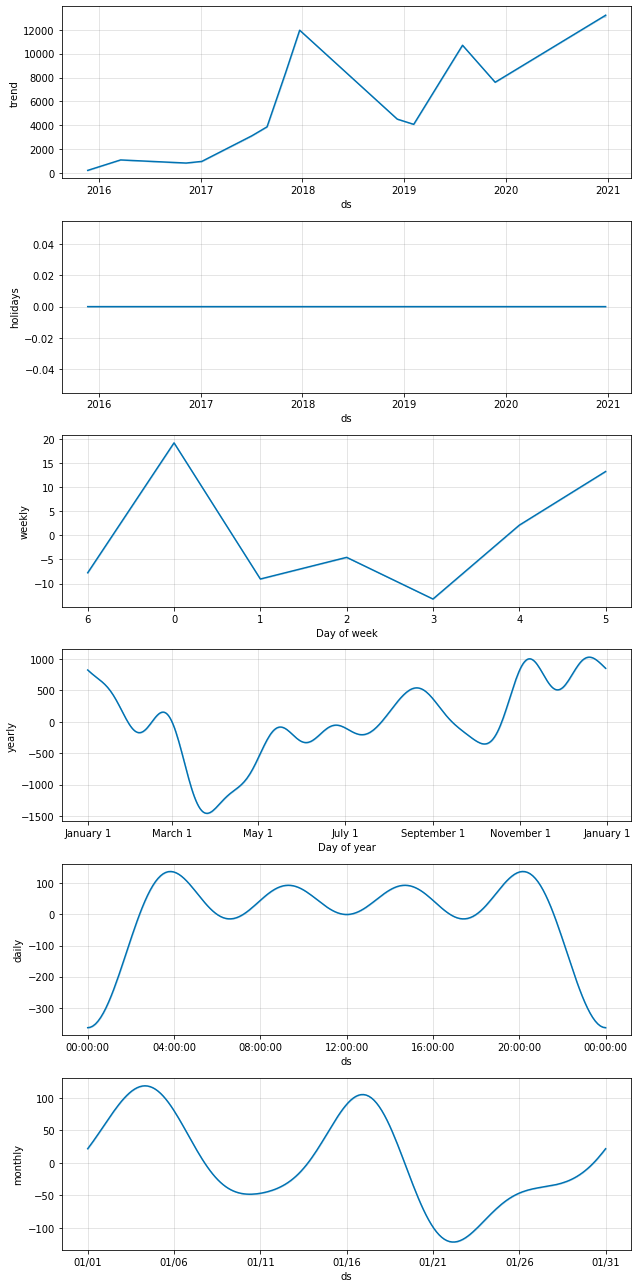

In [83]:
prophet_model_btc.plot_components(forecast_btc);

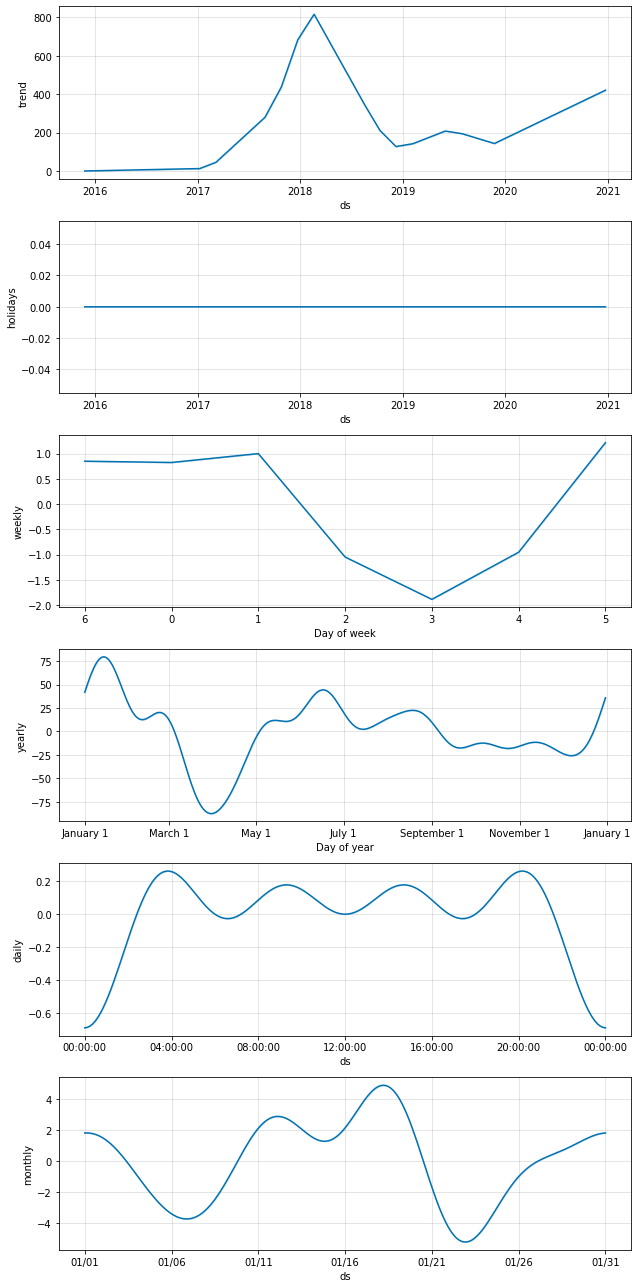

In [84]:
prophet_model_eth.plot_components(forecast_eth);

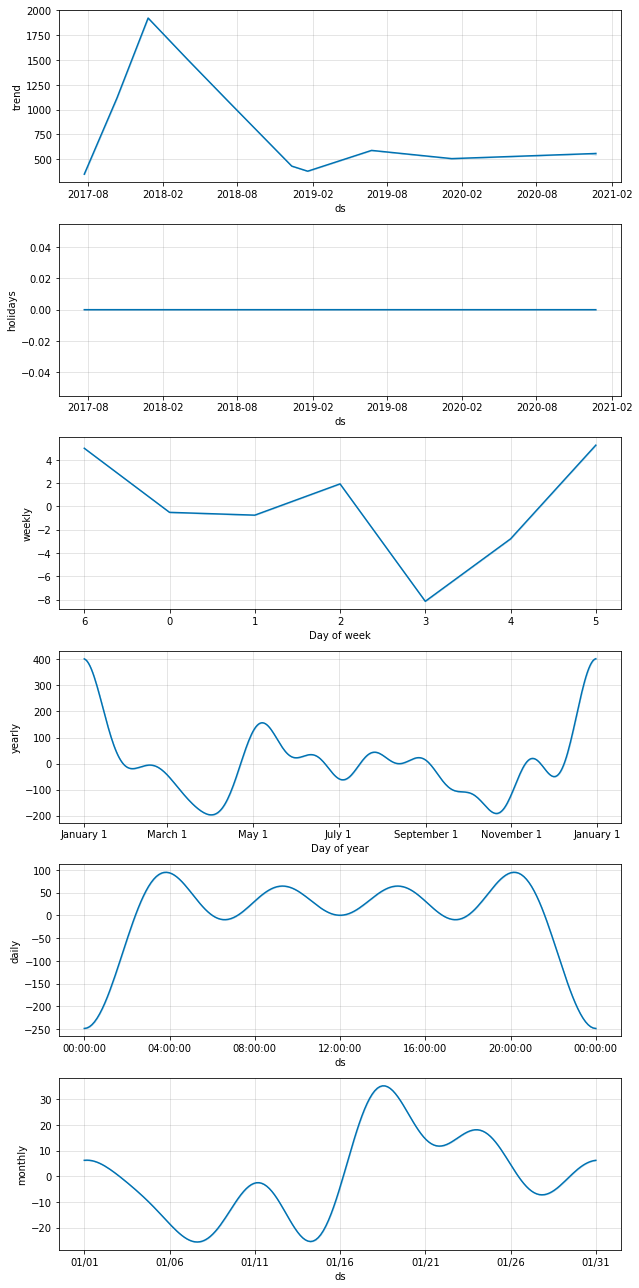

In [85]:
prophet_model_btc_cash.plot_components(forecast_btc_cash);

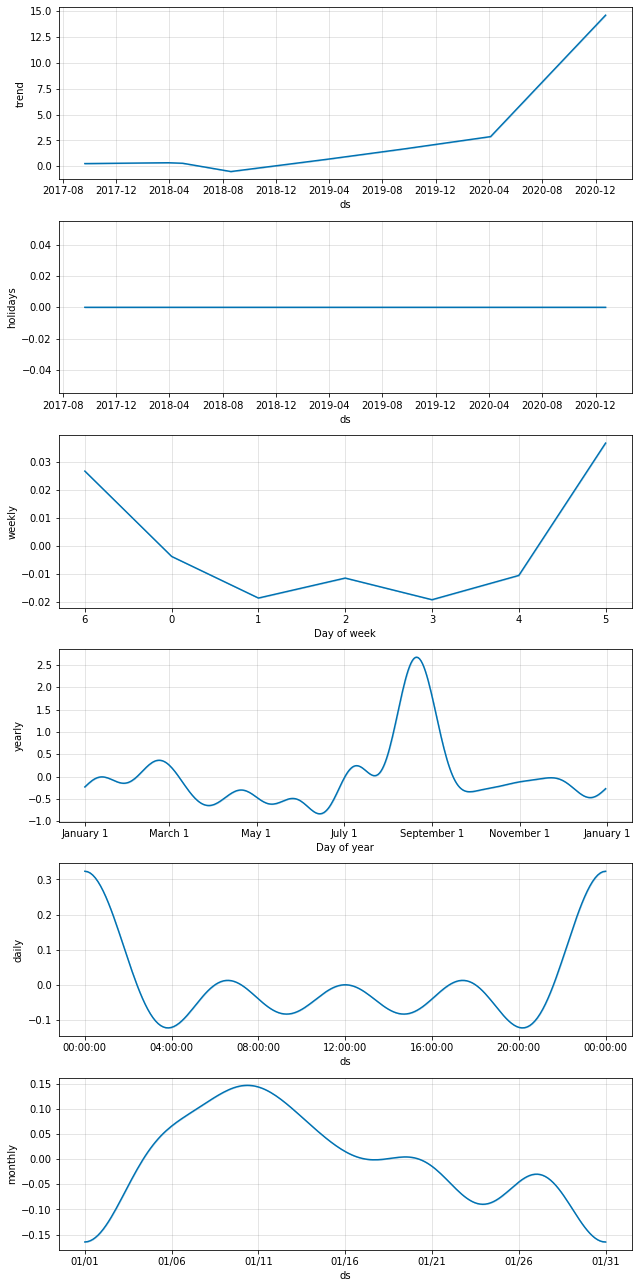

In [86]:
prophet_model_link.plot_components(forecast_link);

In [87]:
forecast_xrp.shape

(1858, 70)

In [88]:
forecast_xrp[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1853,2020-12-19,0.254444,0.012239,0.464453
1854,2020-12-20,0.279684,0.047842,0.531678
1855,2020-12-21,0.304753,0.067307,0.525539
1856,2020-12-22,0.327888,0.104461,0.545036
1857,2020-12-23,0.354133,0.121592,0.588848


In [89]:
forecast_btc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1853,2020-12-19,13893.060383,12386.057244,15338.524835
1854,2020-12-20,13919.837059,12411.203983,15310.776214
1855,2020-12-21,13962.794139,12352.964424,15300.341416
1856,2020-12-22,13909.037666,12437.064553,15184.014332
1857,2020-12-23,13855.209322,12514.953533,15330.909746


In [90]:
forecast_eth[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1853,2020-12-20,412.580969,316.420927,509.782268
1854,2020-12-21,417.965336,323.711240,510.513087
1855,2020-12-22,423.008383,330.749998,517.642812
1856,2020-12-23,424.267909,333.273827,527.291134
1857,2020-12-24,425.219889,325.520175,528.384767


In [91]:
forecast_btc_cash[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1246,2020-12-20,569.426508,328.833099,839.457016
1247,2020-12-21,607.935426,333.382984,869.970567
1248,2020-12-22,641.100354,377.701979,903.954228
1249,2020-12-23,661.994785,391.724275,922.113361
1250,2020-12-24,660.010674,404.707052,928.926368


In [92]:
forecast_link[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1187,2020-12-20,14.325461,13.074707,15.559335
1188,2020-12-21,14.330745,13.049615,15.600219
1189,2020-12-22,14.366427,13.103437,15.650200
1190,2020-12-23,14.432315,13.151913,15.712367
1191,2020-12-24,14.479726,13.140454,15.800599


# Performance of the prediction

In [93]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv_xrp = cross_validation(prophet_model_xrp, horizon='180 days')
df_cv_xrp.head()  

INFO:fbprophet:Making 13 forecasts with cutoffs between 2017-06-12 00:00:00 and 2020-05-27 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-06-13,0.270028,0.243765,0.295705,0.266153,2017-06-12
1,2017-06-14,0.275758,0.248508,0.302187,0.278447,2017-06-12
2,2017-06-15,0.281402,0.254093,0.306696,0.259266,2017-06-12
3,2017-06-16,0.286034,0.259025,0.313450,0.262068,2017-06-12
4,2017-06-17,0.288627,0.262038,0.316186,0.268351,2017-06-12


In [94]:
df_cv_btc = cross_validation(prophet_model_btc, horizon='180 days')
df_cv_btc.head()  

INFO:fbprophet:Making 13 forecasts with cutoffs between 2017-06-12 00:00:00 and 2020-05-27 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-06-13,2881.442008,2826.093315,2940.373136,2717.020020,2017-06-12
1,2017-06-14,2908.562965,2855.195279,2967.111045,2506.370117,2017-06-12
2,2017-06-15,2937.823544,2879.019745,3002.162994,2464.580078,2017-06-12
3,2017-06-16,2962.926127,2898.933979,3023.137471,2518.560059,2017-06-12
4,2017-06-17,2994.418484,2936.575549,3058.598360,2655.879883,2017-06-12


In [95]:
df_cv_eth = cross_validation(prophet_model_eth, horizon='180 days')
df_cv_eth.head()  

INFO:fbprophet:Making 13 forecasts with cutoffs between 2017-06-13 00:00:00 and 2020-05-28 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-06-14,306.838251,294.440054,318.707380,359.053009,2017-06-13
1,2017-06-15,309.408605,297.157942,321.512853,361.933014,2017-06-13
2,2017-06-16,312.907451,301.579882,324.812518,370.226990,2017-06-13
3,2017-06-17,317.071714,305.698238,328.683267,379.414001,2017-06-13
4,2017-06-18,321.819505,310.024203,333.697348,371.458008,2017-06-13


In [96]:
df_cv_btc_cash = cross_validation(prophet_model_btc_cash, horizon='180 days')
df_cv_btc_cash.head()  

INFO:fbprophet:Making 6 forecasts with cutoffs between 2019-03-05 00:00:00 and 2020-05-28 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-03-06,-276.788082,-586.475142,32.052637,133.267960,2019-03-05
1,2019-03-07,-333.389685,-649.516309,-22.048329,132.156082,2019-03-05
2,2019-03-08,-361.571830,-658.099863,-43.518519,129.470261,2019-03-05
3,2019-03-09,-379.867702,-699.880373,-52.951841,133.815567,2019-03-05
4,2019-03-10,-414.602474,-743.349546,-107.090604,132.837814,2019-03-05


In [97]:
df_cv_link = cross_validation(prophet_model_link, horizon='180 days')
df_cv_link.head()  

INFO:fbprophet:Making 5 forecasts with cutoffs between 2019-06-03 00:00:00 and 2020-05-28 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-06-04,0.853275,0.722733,0.993334,0.883250,2019-06-03
1,2019-06-05,0.827631,0.691368,0.969253,1.077118,2019-06-03
2,2019-06-06,0.809658,0.671016,0.951594,1.119633,2019-06-03
3,2019-06-07,0.800045,0.663605,0.937941,1.177613,2019-06-03
4,2019-06-08,0.802075,0.672456,0.941872,1.152620,2019-06-03


In [98]:
df_perf_xrp = performance_metrics(df_cv_xrp)
df_perf_xrp.head()

,horizon,mse,rmse,mae,mape,coverage
0,18 days,0.089249,0.298746,0.175858,0.352474,0.709402
1,19 days,0.099865,0.316015,0.188368,0.376144,0.688034
2,20 days,0.122132,0.349474,0.204842,0.401300,0.662393
3,21 days,0.143558,0.378891,0.220535,0.425968,0.641026
4,22 days,0.167589,0.409377,0.236671,0.450033,0.623932


In [99]:
df_perf_btc = performance_metrics(df_cv_btc)
df_perf_btc.head()

,horizon,mse,rmse,mae,mape,coverage
0,18 days,7.110955e+06,2666.637361,2106.541327,0.326777,0.311966
1,19 days,7.369252e+06,2714.636639,2158.234193,0.336709,0.307692
2,20 days,7.638111e+06,2763.713233,2211.241165,0.346060,0.299145
3,21 days,7.827332e+06,2797.736928,2245.681670,0.352777,0.294872
4,22 days,8.081049e+06,2842.718554,2287.259383,0.358706,0.286325


In [100]:
df_perf_eth = performance_metrics(df_cv_eth)
df_perf_eth.head()

,horizon,mse,rmse,mae,mape,coverage
0,18 days,36220.436505,190.316674,124.981416,0.421682,0.529915
1,19 days,39240.516568,198.092192,129.969438,0.438367,0.525641
2,20 days,41776.936394,204.394071,133.590575,0.452473,0.517094
3,21 days,44182.531445,210.196412,136.774208,0.464547,0.508547
4,22 days,46436.775135,215.491938,139.836722,0.477749,0.500000


In [101]:
df_perf_btc_cash = performance_metrics(df_cv_btc_cash)
df_perf_btc_cash.head()

,horizon,mse,rmse,mae,mape,coverage
0,18 days,94854.285193,307.984229,206.449046,1.147619,0.777778
1,19 days,102330.007047,319.890617,213.201855,1.186351,0.768519
2,20 days,111140.756646,333.377799,221.215348,1.230907,0.759259
3,21 days,120978.440598,347.819552,228.847248,1.274781,0.750000
4,22 days,131571.848459,362.728340,237.274404,1.316866,0.740741


In [102]:
df_perf_link = performance_metrics(df_cv_link)
df_perf_link.head()

,horizon,mse,rmse,mae,mape,coverage
0,18 days,0.714686,0.845391,0.757536,0.351721,0.111111
1,19 days,0.757340,0.870253,0.783869,0.369419,0.100000
2,20 days,0.789311,0.888432,0.802186,0.380524,0.100000
3,21 days,0.819354,0.905182,0.817477,0.391310,0.100000
4,22 days,0.844349,0.918884,0.828683,0.400417,0.111111


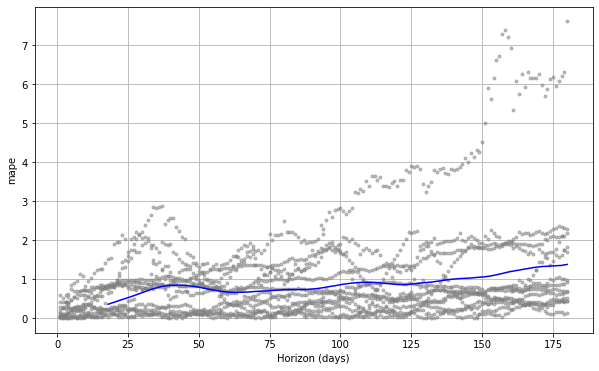

In [103]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv_xrp, metric='mape')

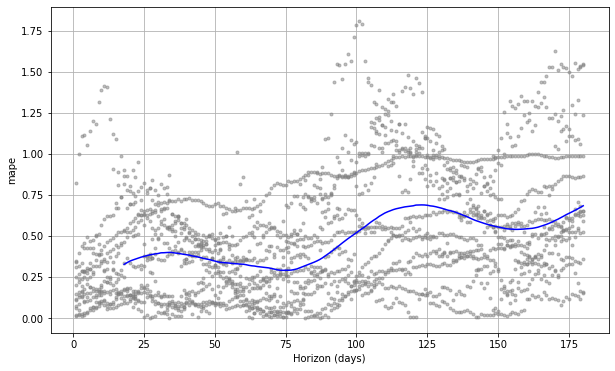

In [104]:
fig = plot_cross_validation_metric(df_cv_btc, metric='mape')

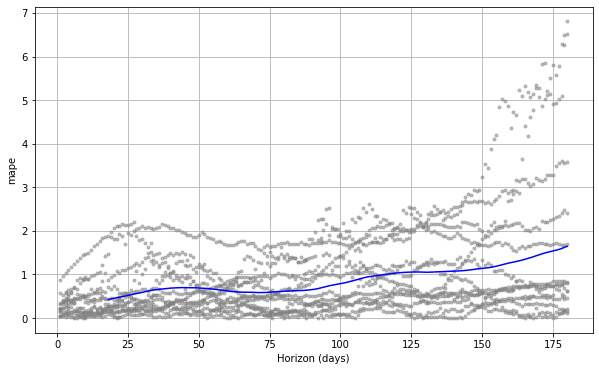

In [105]:
fig = plot_cross_validation_metric(df_cv_eth, metric='mape')

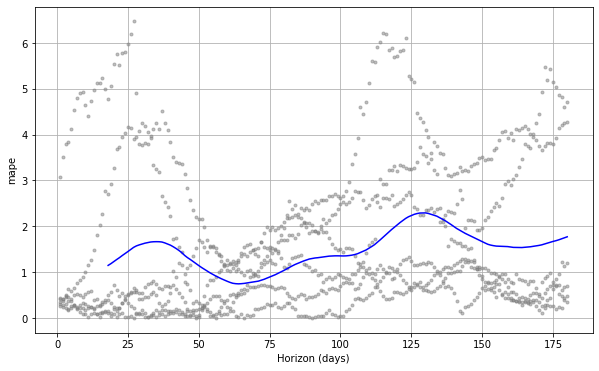

In [106]:
fig = plot_cross_validation_metric(df_cv_btc_cash, metric='mape')

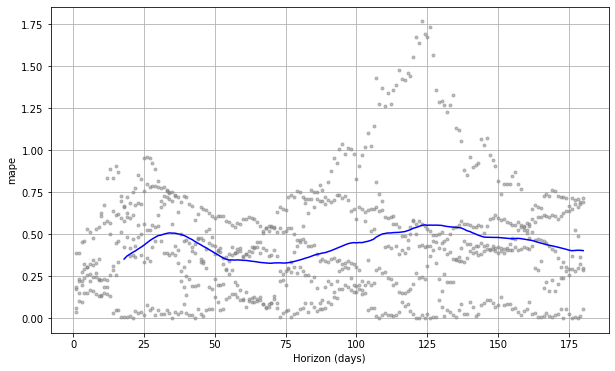

In [107]:
fig = plot_cross_validation_metric(df_cv_link, metric='mape')

# Monte carlo simulation for portfolio optimization

calculate the normalized returns from each of the coin investments

In [116]:
df_xrp = df_xrp.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_btc = df_btc.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_eth = df_eth.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_btc_cash = df_btc_cash.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_link = df_link.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])

In [117]:
for portfolio_df in (df_xrp, df_btc, df_eth, df_btc_cash,df_link): 
    portfolio_df['Normed Return'] = portfolio_df['Close'] /portfolio_df.iloc[0]['Close']

In [119]:
df_xrp

,Date,Close,Normed Return
0,2015-11-23,0.004288,1.000000
1,2015-11-24,0.004242,0.989272
2,2015-11-25,0.004318,1.006996
3,2015-11-26,0.004291,1.000700
4,2015-11-27,0.004276,0.997201
...,...,...,...
1823,2020-11-19,0.303766,70.840951
1824,2020-11-20,0.328068,76.508396
1825,2020-11-21,0.458344,106.889925
1826,2020-11-22,0.443700,103.474813


In [120]:
df_btc

,Date,Close,Normed Return
0,2015-11-23,323.045990,1.000000
1,2015-11-24,320.045990,0.990713
2,2015-11-25,328.205994,1.015973
3,2015-11-26,352.683990,1.091745
4,2015-11-27,358.041992,1.108331
...,...,...,...
1823,2020-11-19,17817.089844,55.153416
1824,2020-11-20,18621.314453,57.642921
1825,2020-11-21,18642.232422,57.707673
1826,2020-11-22,18370.001953,56.864974


Portfolio Allocation
starting Portfolio Allocations consisting of these 5 coins  -

15% in XRP
10% in BTC
20% in ETH
25% in BTC_CASH
30% in LINK

In [121]:
for portfolio_df, allocation in zip((df_xrp, df_btc, df_eth, df_btc_cash,df_link),[.15,.1,.2,.25,.3]):
    portfolio_df['Allocation'] = portfolio_df['Normed Return']*allocation

In [123]:
df_xrp.head()

,Date,Close,Normed Return,Allocation
0,2015-11-23,0.004288,1.000000,0.150000
1,2015-11-24,0.004242,0.989272,0.148391
2,2015-11-25,0.004318,1.006996,0.151049
3,2015-11-26,0.004291,1.000700,0.150105
4,2015-11-27,0.004276,0.997201,0.149580


In [124]:
df_btc.head()

,Date,Close,Normed Return,Allocation
0,2015-11-23,323.045990,1.000000,0.100000
1,2015-11-24,320.045990,0.990713,0.099071
2,2015-11-25,328.205994,1.015973,0.101597
3,2015-11-26,352.683990,1.091745,0.109175
4,2015-11-27,358.041992,1.108331,0.110833


Assuming the starting portfolio Position of $20,000, lets look at how the value of our position changes for each coin

In [125]:
# value of each position
for portfolio_df in (df_xrp, df_btc, df_eth, df_btc_cash,df_link):
    portfolio_df['Position Value'] = portfolio_df['Allocation']*20000

In [126]:
df_xrp.head()

,Date,Close,Normed Return,Allocation,Position Value
0,2015-11-23,0.004288,1.000000,0.150000,3000.000000
1,2015-11-24,0.004242,0.989272,0.148391,2967.817164
2,2015-11-25,0.004318,1.006996,0.151049,3020.988806
3,2015-11-26,0.004291,1.000700,0.150105,3002.098881
4,2015-11-27,0.004276,0.997201,0.149580,2991.604478


In [127]:
df_btc.head()

,Date,Close,Normed Return,Allocation,Position Value
0,2015-11-23,323.045990,1.000000,0.100000,2000.000000
1,2015-11-24,320.045990,0.990713,0.099071,1981.426793
2,2015-11-25,328.205994,1.015973,0.101597,2031.945941
3,2015-11-26,352.683990,1.091745,0.109175,2183.490902
4,2015-11-27,358.041992,1.108331,0.110833,2216.662662


In [134]:
df_eth.head()

,Date,Close,Normed Return,Allocation,Position Value
0,2015-11-24,0.900191,1.000000,0.200000,4000.000000
1,2015-11-25,0.863537,0.959282,0.191856,3837.127898
2,2015-11-26,0.884183,0.982217,0.196443,3928.868429
3,2015-11-27,0.867951,0.964185,0.192837,3856.741514
4,2015-11-28,0.915703,1.017232,0.203446,4068.927594


In [129]:
del(portfolio_df)

In [135]:
df_xrp = df_xrp.set_index('Date')
df_btc = df_btc.set_index('Date')
df_eth = df_eth.set_index('Date')
df_btc_cash = df_btc_cash.set_index('Date')
df_link = df_link.set_index('Date')

In [136]:
# create list of all position values
position_vals = [df_xrp['Position Value'], df_btc['Position Value'], df_eth['Position Value'], df_btc_cash['Position Value'], df_link['Position Value']]

# concatenate the list of position values
portfolio_df = pd.concat(position_vals, axis=1)

# set the column names
portfolio_df.columns = ['Ripple', 'Bitcoin', 'Ethereum', 'Bitcoin Cash','Chain Link']

# add a total portfolio column
portfolio_df['Total'] = portfolio_df.sum(axis=1)

In [137]:
portfolio_df

,Ripple,Bitcoin,Ethereum,Bitcoin Cash,Chain Link,Total
2015-11-23,3000.000000,2000.000000,NaN,NaN,NaN,5.000000e+03
2015-11-24,2967.817164,1981.426793,4.000000e+03,NaN,NaN,8.949244e+03
2015-11-25,3020.988806,2031.945941,3.837128e+03,NaN,NaN,8.890063e+03
2015-11-26,3002.098881,2183.490902,3.928868e+03,NaN,NaN,9.114458e+03
2015-11-27,2991.604478,2216.662662,3.856742e+03,NaN,NaN,9.065009e+03
...,...,...,...,...,...,...
2020-11-20,229525.186567,115285.841827,2.265051e+06,3133.381594,446539.465546,3.059535e+06
2020-11-21,320669.776119,115415.346416,2.441645e+06,3654.733047,487064.752993,3.368449e+06
2020-11-22,310424.440299,113729.948810,2.479776e+06,3473.991786,458165.125684,3.365570e+06
2020-11-23,429556.902985,113693.540006,2.703666e+06,3910.156146,484365.839347,3.735193e+06


Plotting the portfolio

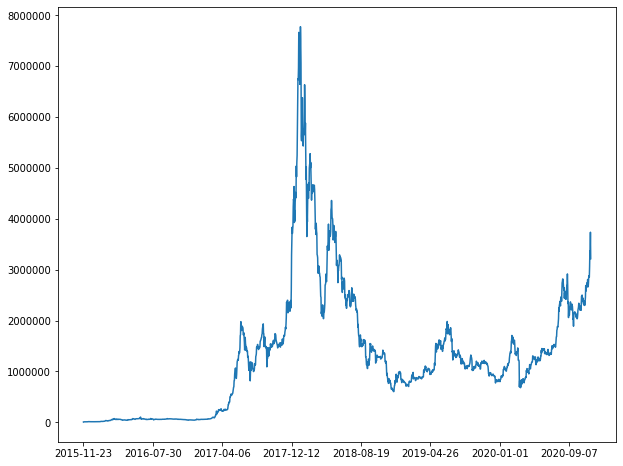

In [138]:
portfolio_df['Total'].plot(figsize=(10,8))

In [ ]:
Plotting the individual portfolio contributions

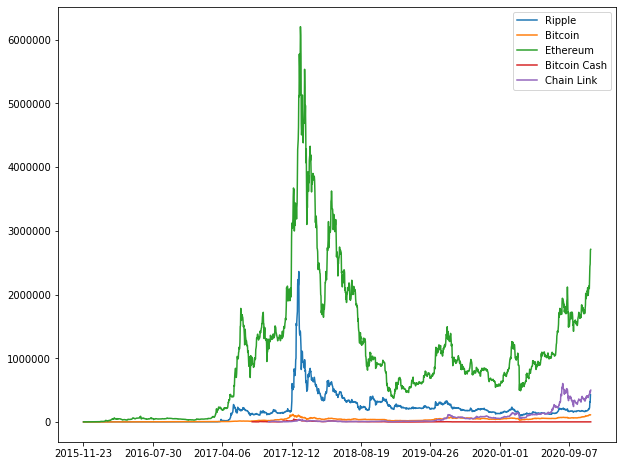

In [139]:
portfolio_df.drop('Total',axis=1).plot(figsize=(10,8))

In [141]:
# Daily Return
portfolio_df['Daily Return'] = portfolio_df['Total'].pct_change(1)
portfolio_df

,Ripple,Bitcoin,Ethereum,Bitcoin Cash,Chain Link,Total,Daily Return
2015-11-23,3000.000000,2000.000000,NaN,NaN,NaN,5.000000e+03,NaN
2015-11-24,2967.817164,1981.426793,4.000000e+03,NaN,NaN,8.949244e+03,0.789849
2015-11-25,3020.988806,2031.945941,3.837128e+03,NaN,NaN,8.890063e+03,-0.006613
2015-11-26,3002.098881,2183.490902,3.928868e+03,NaN,NaN,9.114458e+03,0.025241
2015-11-27,2991.604478,2216.662662,3.856742e+03,NaN,NaN,9.065009e+03,-0.005425
...,...,...,...,...,...,...,...
2020-11-20,229525.186567,115285.841827,2.265051e+06,3133.381594,446539.465546,3.059535e+06,0.072180
2020-11-21,320669.776119,115415.346416,2.441645e+06,3654.733047,487064.752993,3.368449e+06,0.100968
2020-11-22,310424.440299,113729.948810,2.479776e+06,3473.991786,458165.125684,3.365570e+06,-0.000855
2020-11-23,429556.902985,113693.540006,2.703666e+06,3910.156146,484365.839347,3.735193e+06,0.109825


Plotting the Daily return for our portfolio

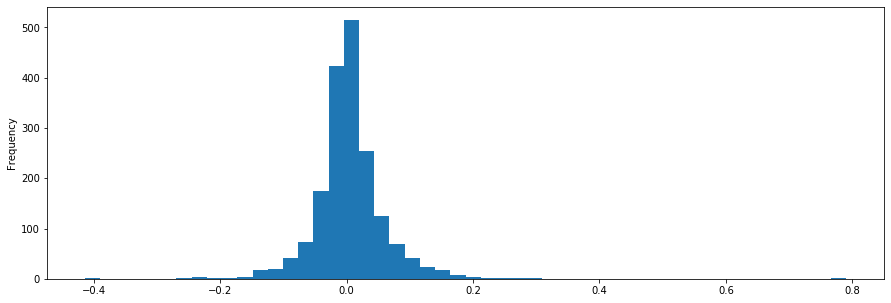

In [145]:
# average daily return
portfolio_df['Daily Return'].mean()

# standard deviation
portfolio_df['Daily Return'].std()

# plot histogram of daily returns
portfolio_df['Daily Return'].plot(kind='hist', bins=50, figsize=(15,5))

The daily return is mostly centered around zero

In [146]:
# cumulative portfolio return
cumulative_return = 100 * (portfolio_df['Total'][-1]/portfolio_df['Total'][0] - 1)
cumulative_return

64218.65807297268

# Sharpe's ratio

Sharpe Ratio = mean (portfolio return - the risk free rate) % standard deviation.

In [147]:
sharpe_ratio = portfolio_df['Daily Return'].mean() / portfolio_df['Daily Return'].std()
annual_sharpe_ratio = (252**0.5) * sharpe_ratio
annual_sharpe_ratio

1.4274528231993593

Lets check a bunch of random allocations of different coins and find out which coins have the best sharpe's ratio. This is what we call as monte carlo simulations.

We will randomly assign weights to our coins in the portfolio using mcmc and then calculate the mean daily return & SD (Standard deviation) of return. Then we can calculate the Sharpe Ratio for many randomly selected allocations.

# Monte carlo simulations

In [149]:
mc_df = pd.concat([df_xrp.Close, df_btc.Close, df_eth.Close, df_btc_cash.Close,df_link.Close], axis=1)
mc_df.columns = ['Ripple', 'Bitcoin', 'Ethereum', 'Bitcoin Cash','Chain Link']
mc_df



,Ripple,Bitcoin,Ethereum,Bitcoin Cash,Chain Link
2015-11-23,0.004288,323.045990,NaN,NaN,NaN
2015-11-24,0.004242,320.045990,0.900191,NaN,NaN
2015-11-25,0.004318,328.205994,0.863537,NaN,NaN
2015-11-26,0.004291,352.683990,0.884183,NaN,NaN
2015-11-27,0.004276,358.041992,0.867951,NaN,NaN
...,...,...,...,...,...
2020-11-20,0.328068,18621.314453,509.744568,258.854919,14.078273
2020-11-21,0.458344,18642.232422,549.486633,301.924805,15.355934
2020-11-22,0.443700,18370.001953,558.068115,286.993408,14.444801
2020-11-23,0.613980,18364.121094,608.454041,323.025818,15.270844


In [151]:
mc_df.tail().pct_change(1).mean()

Ripple          0.187231
Bitcoin        -0.003450
Ethereum        0.046669
Bitcoin Cash    0.071774
Chain Link      0.030524
dtype: float64

In [152]:
mc_df.tail().pct_change(1).head()

,Ripple,Bitcoin,Ethereum,Bitcoin Cash,Chain Link
2020-11-20,NaN,NaN,NaN,NaN,NaN
2020-11-21,0.397101,0.001123,0.077965,0.166386,0.090754
2020-11-22,-0.031950,-0.014603,0.015617,-0.049454,-0.059334
2020-11-23,0.383773,-0.000320,0.090286,0.125551,0.057186
2020-11-24,0.000000,0.000000,0.002809,0.044612,0.033489


In [153]:
# log daily return
log_return = np.log(mc_df/mc_df.shift(1))
log_return.head()

,Ripple,Bitcoin,Ethereum,Bitcoin Cash,Chain Link
2015-11-23,NaN,NaN,NaN,NaN,NaN
2015-11-24,-0.010786,-0.009330,NaN,NaN,NaN
2015-11-25,0.017757,0.025177,-0.041570,NaN,NaN
2015-11-26,-0.006273,0.071931,0.023627,NaN,NaN
2015-11-27,-0.003502,0.015078,-0.018529,NaN,NaN


In [155]:
print(mc_df.columns)

weights = np.array(np.random.random(5))
print('Random Weights:')
print(weights)

print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

Index(['Ripple', 'Bitcoin', 'Ethereum', 'Bitcoin Cash', 'Chain Link'], dtype='object')
Random Weights:
[0.11114486 0.28928923 0.85004075 0.87986544 0.71286856]
Rebalance
[0.03909135 0.10174744 0.29897232 0.30946212 0.25072677]


In [156]:
# expected return
print('Expected Portfolio Return')
exp_ret = np.sum((log_return.mean()*weights)*252)
print(exp_ret)

# expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Expected Portfolio Return
0.5801267704157853
Expected Volatility
0.8357307422527799
Sharpe Ratio
0.6941551160987648


Lets repeat this process a few thousand times to simulate using monte carlo

In [174]:
num_ports = 12000
all_weights = np.zeros((num_ports, len(mc_df.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports): 
    # weights 
    weights = np.array(np.random.random(5)) 
    weights = weights/np.sum(weights)  
    # save the weights
    all_weights[ind,:] = weights
    # expected return 
    ret_arr[ind] = np.sum((log_return.mean()*weights)*252)

    # expected volatility 
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))

    # Sharpe Ratio 
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [175]:
sharpe_arr.max()

1.0862841542151973

If we then get the location of the maximum Sharpe Ratio and then get the allocation for that index. This shows us the optimal allocation out of the 10000 random allocations

In [176]:
sharpe_arr.argmax()

4306

In [179]:
all_weights[4306, :]*100

array([ 6.3145833 , 40.42888424, 43.98763058,  0.19503443,  9.07386746])



These are the best allocations we have received using MCMC. Lets compare how we did from the original Allocation

Original Allocation -

15% in XRP
10% in BTC
20% in ETH
25% in BTC_CASH
30% in LINK

MCMC Allocation -

  6.31% in XRP
  40.4% in BTC
  43.98% in ETH
  0.19% IN BTC_CASH
  9.07% LINK 



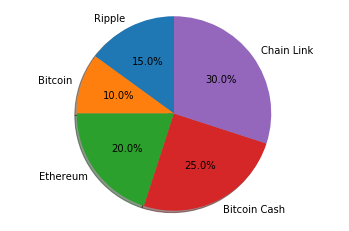

In [182]:
# Initial Allocation
labels = 'Ripple', 'Bitcoin', 'Ethereum', 'Bitcoin Cash', 'Chain Link'
sizes = [15, 10, 20, 25,30]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

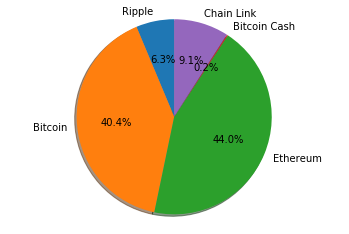

In [183]:
# After Monte Carlo Simulations

labels = 'Ripple', 'Bitcoin', 'Ethereum', 'Bitcoin Cash', 'Chain Link'
sizes = [6.31, 40.4, 43.98, 0.19,9.07]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Prediction using RNN/LSTM network

In [231]:
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.layers import LSTM
from sklearn import preprocessing


In [219]:
df_ripple = pd.read_csv('XRP-USD.csv')
df_ripple.shape

(1828, 7)

In [192]:
1828 - 457

1371

In [220]:
df_ripple_train = df_ripple.iloc[1:1371,:]

In [209]:
df_ripple_train.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
1,2015-11-24,0.004288,0.004288,0.004201,0.004242,0.004242,197940
2,2015-11-25,0.004242,0.004325,0.004228,0.004318,0.004318,197356
3,2015-11-26,0.004317,0.004435,0.004227,0.004291,0.004291,400520
4,2015-11-27,0.004276,0.004304,0.004229,0.004276,0.004276,199790
5,2015-11-28,0.004275,0.004275,0.004208,0.004238,0.004238,195480
6,2015-11-29,0.004243,0.004299,0.004234,0.004299,0.004299,197822
7,2015-11-30,0.004298,0.004322,0.004185,0.004201,0.004201,272695
8,2015-12-01,0.004202,0.004208,0.004054,0.004090,0.004090,312401
9,2015-12-02,0.004091,0.004189,0.004041,0.004173,0.004173,328403
10,2015-12-03,0.004176,0.004304,0.004173,0.004262,0.004262,139104


In [210]:
df_ripple_train.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume
1351,2019-08-05,0.319723,0.331414,0.319410,0.323564,0.323564,1203381138
1352,2019-08-06,0.324018,0.324946,0.308895,0.311326,0.311326,1069603911
1353,2019-08-07,0.311492,0.315573,0.308720,0.311969,0.311969,967534123
1354,2019-08-08,0.311785,0.312618,0.305112,0.307661,0.307661,907305889
1355,2019-08-09,0.307567,0.308218,0.293271,0.297343,0.297343,1021136187
1356,2019-08-10,0.297245,0.304747,0.293443,0.298721,0.298721,1077459338
1357,2019-08-11,0.298566,0.306181,0.296911,0.301915,0.301915,838671654
1358,2019-08-12,0.302169,0.303528,0.298506,0.300322,0.300322,762308356
1359,2019-08-13,0.300661,0.301178,0.293562,0.296639,0.296639,853175559
1360,2019-08-14,0.296719,0.297220,0.252390,0.263343,0.263343,1794754609


In [221]:
df_ripple_test = df_ripple.iloc[1371:1828,:]

In [212]:
df_ripple_test.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
1371,2019-08-25,0.272612,0.274924,0.267954,0.270088,0.270088,964693736
1372,2019-08-26,0.269946,0.277432,0.268575,0.270788,0.270788,1332395983
1373,2019-08-27,0.270899,0.271042,0.266216,0.269618,0.269618,1028940803
1374,2019-08-28,0.269583,0.270293,0.252948,0.257450,0.257450,1275267910
1375,2019-08-29,0.257461,0.261091,0.249951,0.257045,0.257045,1279995806
1376,2019-08-30,0.256951,0.257325,0.252734,0.256218,0.256218,997071647
1377,2019-08-31,0.256195,0.260507,0.255454,0.259204,0.259204,845142390
1378,2019-09-01,0.259171,0.259659,0.254306,0.258054,0.258054,825579908
1379,2019-09-02,0.258064,0.262465,0.254382,0.260820,0.260820,1044772829
1380,2019-09-03,0.260838,0.265279,0.258163,0.263139,0.263139,1162545092


In [213]:
# df_ripple_train = np.array(df_ripple_train)
# df_ripple_test = np.array(df_ripple_test)

In [227]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# fix random seed for reproducibility
np.random.seed(5)

In [222]:
# take close price column
ripple_y = df_xrp['Close'].values
ripple_dataset=ripple_y.reshape(-1, 1)

In [223]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
ripple_dataset = scaler.fit_transform(ripple_dataset)

In [225]:
# split into train and test sets, 25% test data, 75% training data
ripple_train_size = int(len(ripple_dataset) * 0.75)
ripple_test_size = len(ripple_dataset) - ripple_train_size
ripple_train, ripple_test = ripple_dataset[0:ripple_train_size,:], ripple_dataset[ripple_train_size:len(ripple_dataset),:]

In [253]:
len(ripple_train)

1371

In [228]:
# reshape into X=t and Y=t+1, timestep 240
look_back = 240
ripple_trainX, ripple_trainY = create_dataset(ripple_train, look_back)
ripple_testX, ripple_testY = create_dataset(ripple_test, look_back)

In [229]:
# reshape input to be [samples, time steps, features]
ripple_trainX = np.reshape(ripple_trainX, (ripple_trainX.shape[0], 1, ripple_trainX.shape[1]))
ripple_testX = np.reshape(ripple_testX, (ripple_testX.shape[0], 1, ripple_testX.shape[1]))

In [232]:
# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
ripple_lstm_model = Sequential()
ripple_lstm_model.add(LSTM(25, input_shape=(1, look_back)))
ripple_lstm_model.add(Dropout(0.1))
ripple_lstm_model.add(Dense(1))
ripple_lstm_model.compile(loss='mse', optimizer='adam')
ripple_lstm_model.fit(ripple_trainX, ripple_trainY, epochs=1000, batch_size=240, verbose=1)

Epoch 1/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0110
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 3/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 4/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 5/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 6/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 7/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 8/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 9/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 10/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 11/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 12/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 13/1000
5/5 [==============================

5/5 [==============================] - 0s 2ms/step - loss: 3.3986e-04
Epoch 197/1000
5/5 [==============================] - 0s 2ms/step - loss: 3.4851e-04
Epoch 198/1000
5/5 [==============================] - 0s 3ms/step - loss: 3.4121e-04
Epoch 199/1000
5/5 [==============================] - 0s 3ms/step - loss: 3.9648e-04
Epoch 200/1000
5/5 [==============================] - 0s 3ms/step - loss: 3.5797e-04
Epoch 201/1000
5/5 [==============================] - 0s 3ms/step - loss: 2.7822e-04
Epoch 202/1000
5/5 [==============================] - 0s 3ms/step - loss: 3.5436e-04
Epoch 203/1000
5/5 [==============================] - 0s 2ms/step - loss: 3.3291e-04
Epoch 204/1000
5/5 [==============================] - 0s 3ms/step - loss: 3.2142e-04
Epoch 205/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.9422e-04
Epoch 206/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.9402e-04
Epoch 207/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.8211

5/5 [==============================] - 0s 2ms/step - loss: 2.4513e-04
Epoch 389/1000
5/5 [==============================] - 0s 3ms/step - loss: 2.3083e-04
Epoch 390/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.6643e-04
Epoch 391/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.9977e-04
Epoch 392/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.3224e-04
Epoch 393/1000
5/5 [==============================] - 0s 3ms/step - loss: 2.8810e-04
Epoch 394/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.4059e-04
Epoch 395/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.6972e-04
Epoch 396/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.0954e-04
Epoch 397/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.5482e-04
Epoch 398/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.1048e-04
Epoch 399/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.8249

5/5 [==============================] - 0s 3ms/step - loss: 1.9241e-04
Epoch 581/1000
5/5 [==============================] - 0s 3ms/step - loss: 2.5720e-04
Epoch 582/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.9741e-04
Epoch 583/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.2707e-04
Epoch 584/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.1437e-04
Epoch 585/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.4085e-04
Epoch 586/1000
5/5 [==============================] - 0s 3ms/step - loss: 1.8940e-04
Epoch 587/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.0216e-04
Epoch 588/1000
5/5 [==============================] - 0s 3ms/step - loss: 2.4532e-04
Epoch 589/1000
5/5 [==============================] - 0s 3ms/step - loss: 2.1254e-04
Epoch 590/1000
5/5 [==============================] - 0s 3ms/step - loss: 2.0023e-04
Epoch 591/1000
5/5 [==============================] - 0s 3ms/step - loss: 1.5945

5/5 [==============================] - 0s 4ms/step - loss: 2.0209e-04
Epoch 773/1000
5/5 [==============================] - 0s 3ms/step - loss: 2.0168e-04
Epoch 774/1000
5/5 [==============================] - 0s 3ms/step - loss: 3.0916e-04
Epoch 775/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.8491e-04
Epoch 776/1000
5/5 [==============================] - 0s 3ms/step - loss: 1.9646e-04
Epoch 777/1000
5/5 [==============================] - 0s 3ms/step - loss: 1.5715e-04
Epoch 778/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.2250e-04
Epoch 779/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.8011e-04
Epoch 780/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.9946e-04
Epoch 781/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.5076e-04
Epoch 782/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.7091e-04
Epoch 783/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.5498

5/5 [==============================] - 0s 2ms/step - loss: 1.8522e-04
Epoch 965/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.3937e-04
Epoch 966/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.3830e-04
Epoch 967/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.7909e-04
Epoch 968/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.5728e-04
Epoch 969/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.4407e-04
Epoch 970/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.6652e-04
Epoch 971/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.5871e-04
Epoch 972/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.5402e-04
Epoch 973/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.6682e-04
Epoch 974/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.8361e-04
Epoch 975/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.1206

In [234]:
# make predictions
ripple_trainPredict = ripple_lstm_model.predict(ripple_trainX)
ripple_testPredict = ripple_lstm_model.predict(ripple_testX)

In [249]:
#len(ripple_testX)
ripple_test_size

457

In [235]:
# invert predictions
ripple_trainPredict = scaler.inverse_transform(ripple_trainPredict)
ripple_trainY = scaler.inverse_transform([ripple_trainY])
ripple_testPredict = scaler.inverse_transform(ripple_testPredict)
ripple_testY = scaler.inverse_transform([ripple_testY])

In [236]:
# calculate root mean squared error
ripple_trainScore = math.sqrt(mean_squared_error(ripple_trainY[0], ripple_trainPredict[:,0]))
print('Train Score for the Ripple LSTM: %.2f RMSE' % (ripple_trainScore))
ripple_testScore = math.sqrt(mean_squared_error(ripple_testY[0], ripple_testPredict[:,0]))
print('Test Score for the Ripple LSTM: %.2f RMSE' % (ripple_testScore))

Train Score for the Ripple LSTM: 0.03 RMSE
Test Score for the Ripple LSTM: 0.02 RMSE


In [237]:
# shift train predictions for plotting
ripple_trainPredictPlot = np.empty_like(ripple_dataset)
ripple_trainPredictPlot[:, :] = np.nan
ripple_trainPredictPlot[look_back:len(ripple_trainPredict)+look_back, :] = ripple_trainPredict


In [238]:
# shift test predictions for plotting
ripple_testPredictPlot = np.empty_like(ripple_dataset)
ripple_testPredictPlot[:, :] = np.nan
ripple_testPredictPlot[len(ripple_trainPredict)+(look_back*2)+1:len(ripple_dataset)-1, :] = ripple_testPredict


testPrices for Ripple using LSTM:


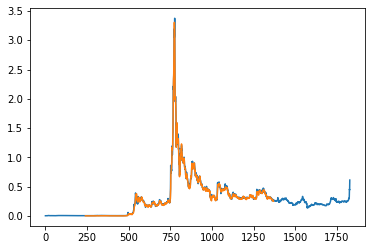

In [239]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(ripple_dataset))
plt.plot(ripple_trainPredictPlot)
print('testPrices for Ripple using LSTM:')
ripple_testPrices=scaler.inverse_transform(ripple_dataset[ripple_test_size+look_back:])

In [246]:
ripple_train_size

1371

In [240]:
print('Ripple testPredictions using LSTM:')
print(ripple_testPredict)

Ripple testPredictions using LSTM:
[[0.18183821]
 [0.17945935]
 [0.17838362]
 [0.1788699 ]
 [0.18322392]
 [0.18277477]
 [0.18538731]
 [0.19018568]
 [0.20171161]
 [0.21841122]
 [0.21821302]
 [0.22352834]
 [0.22865567]
 [0.22304802]
 [0.2258511 ]
 [0.22595489]
 [0.21999191]
 [0.22032645]
 [0.22212273]
 [0.22810346]
 [0.21437767]
 [0.20744331]
 [0.20734681]
 [0.20696658]
 [0.20454824]
 [0.19436733]
 [0.18966648]
 [0.19539905]
 [0.20141345]
 [0.2043693 ]
 [0.19952269]
 [0.19976294]
 [0.20004247]
 [0.1968097 ]
 [0.1896019 ]
 [0.18923452]
 [0.18862712]
 [0.1895635 ]
 [0.1917126 ]
 [0.18961506]
 [0.19543   ]
 [0.1940371 ]
 [0.19231442]
 [0.19141293]
 [0.19664416]
 [0.19592743]
 [0.19114102]
 [0.1909765 ]
 [0.19267608]
 [0.19094585]
 [0.18476284]
 [0.18118604]
 [0.18200378]
 [0.1779358 ]
 [0.17381655]
 [0.16738202]
 [0.17471889]
 [0.171705  ]
 [0.17301667]
 [0.16701655]
 [0.16580123]
 [0.17180738]
 [0.16641921]
 [0.16597334]
 [0.16645956]
 [0.16390067]
 [0.16229141]
 [0.15569168]
 [0.16051643]

In [242]:
len(ripple_testPredict)

216

In [243]:
len(ripple_testPrices)

1131

In [262]:
# export prediction and actual prices
#final_ripple_df = pd.DataFrame(data={"prediction": np.around(list(ripple_testPredict.reshape(-1)), decimals=2), "test_price": np.around(list(ripple_testPrices.reshape(-1)), decimals=2)})

In [ ]:
df_litecoin = pd.read_csv('LTC-USD.csv')
df_litecoin.shape

In [257]:
df_litecoin = pd.read_csv('LTC-USD.csv')
df_litecoin.shape

(1828, 7)

# Random Forest

In [12]:
def standard_aggregate(count, val1, val2): return math.sqrt((val2/count) - (val1/count)**2)

In [45]:
class decision_tree():
    
    def __init__(self, X, Y, no_of_features, feature_indices,indices,tree_depth=10, min_leaf_size=5):
        
        self.X, self.Y, self.indices, self.min_leaf_size, self.feature_indices = X, Y, indices, min_leaf_size, feature_indices
        
        self.tree_depth = tree_depth

        self.no_of_features = no_of_features
        self.num, self.count = len(indices), X.shape[1]
        self.value = np.mean(Y[indices])
        self.score_val = float('inf')
        self.find_split()
        
    def find_split(self):
        for i in self.feature_indices: self.find_better_split(i)
        if self.is_a_leaf: return
        X = self.split_column
        left_side = np.nonzero(X<=self.split)[0]
        right_side = np.nonzero(X>self.split)[0]
        left_indices = np.random.permutation(self.X.shape[1])[:self.no_of_features]
        right_indices = np.random.permutation(self.X.shape[1])[:self.no_of_features]
        self.left_side = decision_tree(self.X, self.Y, self.no_of_features, left_indices, self.indices[left_side], tree_depth=self.tree_depth-1, min_leaf_size=self.min_leaf_size)
        self.right_side = decision_tree(self.X, self.Y, self.no_of_features, right_indices, self.indices[right_side], tree_depth=self.tree_depth-1, min_leaf_size=self.min_leaf_size)

    def find_better_split(self, variable_index):
        X, Y = self.X.values[self.indices,variable_index], self.Y[self.indices]
        sort_indices = np.argsort(X)
        sort_Y,sort_X = Y[sort_indices], X[sort_indices]
        right_count,right_sum,right_sum2 = self.num, sort_Y.sum(), (sort_Y**2).sum()
        left_count,left_sum,left_sum2 = 0,0.,0.

        for i in range(0,self.num-self.min_leaf_size-1):
            Xi,Yi = sort_X[i],sort_Y[i]
            left_count += 1; right_count -= 1
            left_sum += Yi; right_sum -= Yi
            left_sum2 += Yi**2; right_sum2 -= Yi**2
            if i<self.min_leaf_size or Xi==sort_X[i+1]:
                continue

            left_std = standard_aggregate(left_count, left_sum, left_sum2)
            right_std = standard_aggregate(right_count, right_sum, right_sum2)
            current_score = left_std*left_count + right_std*right_count
            if current_score<self.score_val: 
                self.variable_index,self.score_val,self.split = variable_index,current_score,Xi

    @property
    def split_name(self): return self.X.columns[self.variable_index]
    
    @property
    def split_column(self): return self.X.values[self.indices,self.variable_index]

    @property
    def is_a_leaf(self): return self.score_val == float('inf') or self.tree_depth <= 0 
    

    def predict(self, X):
        return np.array([self.row_predict(Xi) for Xi in X])

    def row_predict(self, Xi):
        if self.is_a_leaf: return self.value
        a = self.left_side if Xi[self.variable_index]<=self.split else self.right_side
        return a.row_predict(Xi)

In [46]:
class random_forest():
    
    def __init__(self, X, Y, no_of_trees, no_of_features, sample_size, tree_depth=10, min_leaf_size=5):
        
        np.random.seed(12)
        
        if no_of_features == 'log2':
            self.no_of_features = int(np.log2(X.shape[1]))
        if no_of_features == 'sqrt':
            self.no_of_features = int(np.sqrt(X.shape[1]))
            
        else:
            self.no_of_features = no_of_features
 
        self.X, self.Y, self.sample_size, self.tree_depth, self.min_leaf_size  = X, Y, sample_size,tree_depth, min_leaf_size
    
        self.tree = [self.tree_create() for i in range(no_of_trees)]

    def tree_create(self):
        
        indices = np.random.permutation(len(self.Y))[:self.sample_size]
        
        feature_indices = np.random.permutation(self.X.shape[1])[:self.no_of_features]
        
        return decision_tree(self.X.iloc[indices], self.Y[indices], self.no_of_features, feature_indices,
                    indices=np.array(range(self.sample_size)),tree_depth = self.tree_depth, min_leaf_size=self.min_leaf_size)
        
    def predict(self, k):
        
        return np.mean([i.predict(k) for i in self.tree], axis=0)


In [20]:
df_btc

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2015-11-23,2015-11-23,324.350006,325.118011,321.290009,323.045990,323.045990,27478900
2015-11-24,2015-11-24,323.014008,323.058014,318.118011,320.045990,320.045990,29362600
2015-11-25,2015-11-25,320.045013,329.134003,316.769989,328.205994,328.205994,41666900
2015-11-26,2015-11-26,328.303009,366.756989,328.229004,352.683990,352.683990,106105000
2015-11-27,2015-11-27,351.860992,363.588989,347.869995,358.041992,358.041992,55179100
...,...,...,...,...,...,...,...
2020-11-19,2020-11-19,17803.861328,18119.546875,17382.554688,17817.089844,17817.089844,36985055355
2020-11-20,2020-11-20,17817.083984,18773.226563,17765.794922,18621.314453,18621.314453,36992873940
2020-11-21,2020-11-21,18621.316406,18936.621094,18444.359375,18642.232422,18642.232422,39650210707


In [25]:
df_btc.index = DatetimeIndex(df_btc['Date'])

In [26]:
X = df_btc
X["btc_price"] = (2*df_btc.High + df_btc.Low + df_btc.Close)/4

In [27]:
X.drop(columns = ['Date','Open','High','Low','Close','Adj Close'], inplace = True)

In [29]:
X.columns = ['Volume','btc_price']

In [30]:
X.drop(X[X.Volume.isnull()].index,inplace=True)
X.drop(X[X.Volume == '-'].index,inplace=True)

Text(0, 0.5, 'Bitcoin Price')

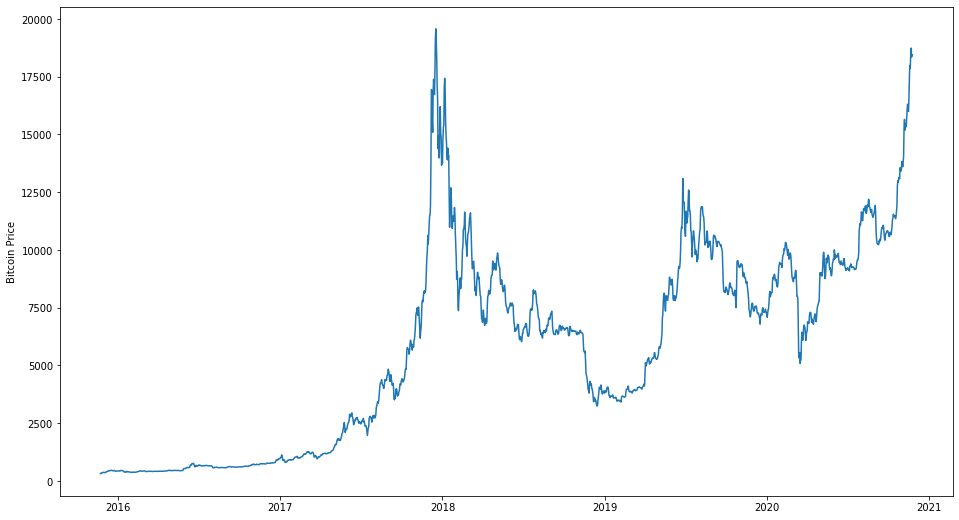

In [31]:
fig, (ax1) = plt.subplots(1, 1, figsize=(16,9))
ax1.plot(X.index,X['btc_price'])
ax1.set_ylabel("Bitcoin Price")

Setting the bitcoin price as Y

In [32]:
Y = X.btc_price

In [33]:
X.drop(['btc_price'],inplace = True,axis=1)

In [ ]:
Creating random Forest trees

In [52]:
rf_base = random_forest(X=X,Y=Y,no_of_trees=40,no_of_features=4,sample_size=1200)

In [53]:
tree = rf_base.tree_create()

In [54]:
y_pred = rf_base.predict(X.tail(365).values)

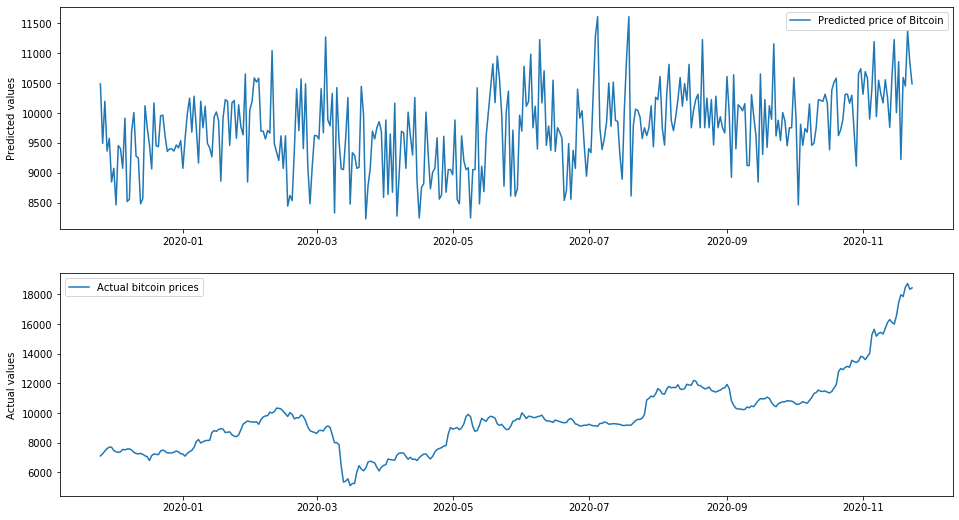

In [55]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))
ax1.plot(X.tail(365).index,y_pred,label="Predicted price of Bitcoin")
ax1.set_ylabel("Predicted values")
ax2.set_ylabel("Actual values")
ax1.legend(loc='best')
ax2.plot(X.tail(365).index,Y.tail(365),label="Actual bitcoin prices")
ax2.legend(loc='best')

We need to use moving average values to reduce the noise and also because the data has too many fluctuations

In [68]:
exp_mov_avg_short = X.ewm(span=15, adjust=False).mean()

In [69]:
Y_short = Y.ewm(span=7, adjust=False).mean()

In [70]:
rf_mov_avg = random_forest(X=exp_mov_avg_short,Y=Y_short,no_of_trees=40,no_of_features=4,sample_size=1200)

In [71]:
Y_pred_short = rf_mov_avg.predict(exp_mov_avg_short.tail(365).values)

In [72]:
rf_mov_avg.tree_create()

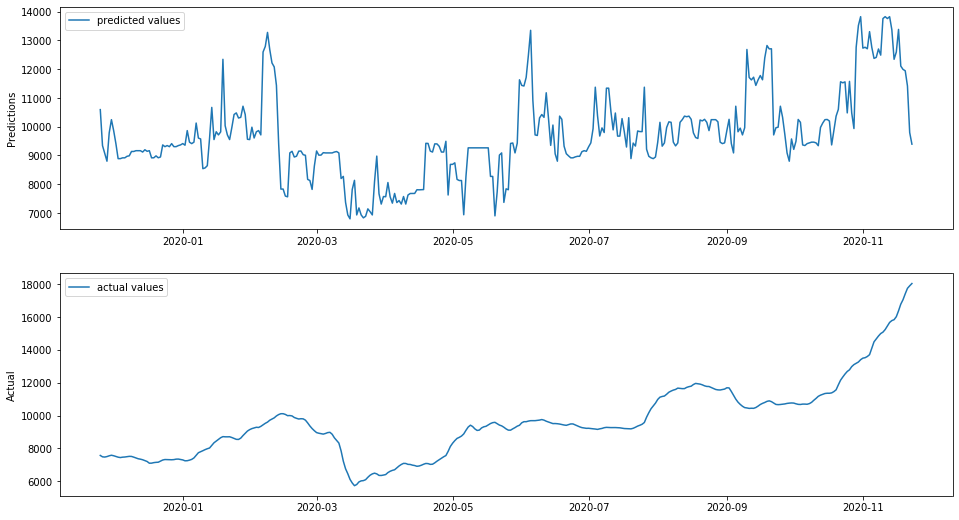

In [73]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))
ax1.plot(exp_mov_avg_short.tail(365).index,Y_pred_short,label="predicted values")
ax2.plot(X.tail(365).index,Y_short.tail(365),label="actual values")
ax1.set_ylabel("Predictions")
ax2.set_ylabel("Actual")
ax1.legend(loc='best')
ax2.legend(loc='best')

In [76]:
signal_trading_weekly = pd.DataFrame(np.sign(np.diff(Y_pred_short)),index=X.tail(364).index,columns=["signal"])


In [77]:
signal_trading_weekly.head()

,signal
Date,
2019-11-26,-1.0
2019-11-27,-1.0
2019-11-28,-1.0
2019-11-29,1.0
2019-11-30,1.0


In [78]:
signal_trading_weekly = signal_trading_weekly.shift(1)

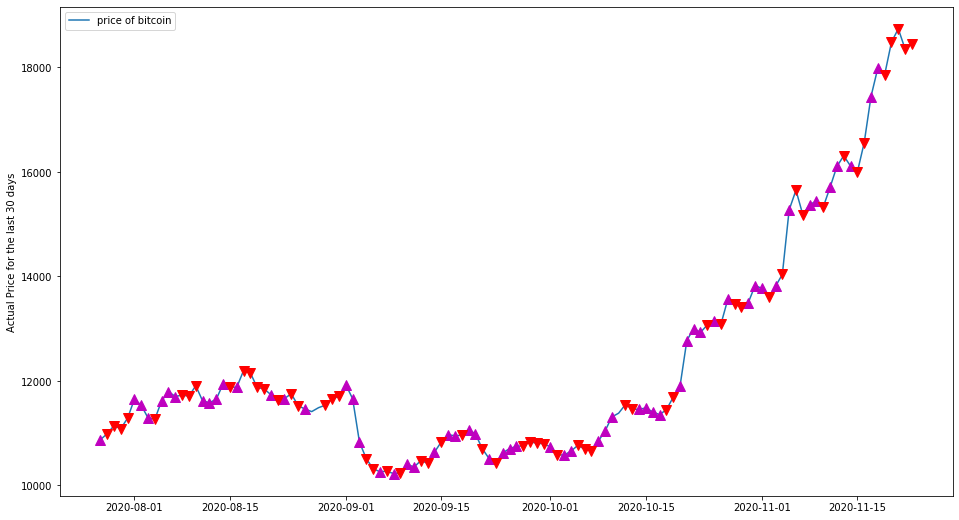

In [81]:
fig, (ax2) = plt.subplots(1, 1, figsize=(16,9))

time_period = 120

Y_temp = pd.DataFrame(Y_short.tail(time_period),index =X.tail(time_period).index)
ax2.plot(X.tail(time_period).index,Y.tail(time_period),label="price of bitcoin")

ax2.set_ylabel("Actual Price for the last 30 days")

ax2.legend(loc='best')

# Buy signals
ax2.plot(signal_trading_weekly.tail(time_period).loc[signal_trading_weekly.signal == 1.0].index, 
         Y.tail(time_period)[signal_trading_weekly.signal == 1.0],'^', markersize=10, color='m')

# Sell signals
ax2.plot(signal_trading_weekly.tail(time_period).loc[signal_trading_weekly.signal == -1.0].tail(time_period).index, 
         Y.tail(time_period)[signal_trading_weekly.signal == -1.0],'v', markersize=10, color='r')

In [179]:
# Setting the starting capital for $20,000
start_capital= float(20000.0)

In [178]:
del(diff_positions)

In [128]:
df_btc_main.index = DatetimeIndex(df_btc_main['Date'])

In [180]:
# creating a dataframe for positions
df_positions = pd.DataFrame(index=df_btc_main.index).fillna(0.0)
df_positions

""
Date
2015-11-23
2015-11-24
2015-11-25
2015-11-26
2015-11-27
...
2020-11-19
2020-11-20
2020-11-21


In [181]:
# Lets buy $5000 worth of coins
df_positions['btc_price'] = 5000*df_btc_main['Close']   
df_positions

,btc_price
Date,
2015-11-23,1.615230e+06
2015-11-24,1.600230e+06
2015-11-25,1.641030e+06
2015-11-26,1.763420e+06
2015-11-27,1.790210e+06
...,...
2020-11-19,8.908545e+07
2020-11-20,9.310657e+07
2020-11-21,9.321116e+07


In [182]:
# Initial value of the portfolio owned in bitcoins
df_portfolio = df_positions.multiply(Y_short.tail(1500), axis=0)
df_portfolio

,btc_price
Date,
2015-11-23,NaN
2015-11-24,NaN
2015-11-25,NaN
2015-11-26,NaN
2015-11-27,NaN
...,...
2020-11-19,1.518567e+12
2020-11-20,1.620565e+12
2020-11-21,1.653482e+12


In [183]:
# Saving the difference values
diff_positions = df_positions.diff()
diff_positions

,btc_price
Date,
2015-11-23,NaN
2015-11-24,-15000.000
2015-11-25,40800.020
2015-11-26,122389.980
2015-11-27,26790.010
...,...
2020-11-19,65419.925
2020-11-20,4021123.045
2020-11-21,104589.845


In [184]:
# Add `holdings` to portfolio
df_portfolio['holdings'] = (df_positions.multiply(Y_short.tail(1500), axis=0)).sum(axis=1)
df_portfolio


,btc_price,holdings
Date,,
2015-11-23,NaN,0.000000e+00
2015-11-24,NaN,0.000000e+00
2015-11-25,NaN,0.000000e+00
2015-11-26,NaN,0.000000e+00
2015-11-27,NaN,0.000000e+00
...,...,...
2020-11-19,1.518567e+12,1.518567e+12
2020-11-20,1.620565e+12,1.620565e+12
2020-11-21,1.653482e+12,1.653482e+12


In [185]:
# "Cash" left after buying
df_portfolio['cash'] = start_capital - (diff_positions.multiply(Y_short.tail(1500), axis=0)).sum(axis=1).cumsum()   

df_portfolio

,btc_price,holdings,cash
Date,,,
2015-11-23,NaN,0.000000e+00,2.000000e+04
2015-11-24,NaN,0.000000e+00,2.000000e+04
2015-11-25,NaN,0.000000e+00,2.000000e+04
2015-11-26,NaN,0.000000e+00,2.000000e+04
2015-11-27,NaN,0.000000e+00,2.000000e+04
...,...,...,...
2020-11-19,1.518567e+12,1.518567e+12,-4.721059e+11
2020-11-20,1.620565e+12,1.620565e+12,-5.420954e+11
2020-11-21,1.653482e+12,1.653482e+12,-5.439508e+11


In [186]:
# "Total" value of the Crypto portfolio
df_portfolio['total'] = df_portfolio['cash'] + df_portfolio['holdings']
df_portfolio


,btc_price,holdings,cash,total
Date,,,,
2015-11-23,NaN,0.000000e+00,2.000000e+04,2.000000e+04
2015-11-24,NaN,0.000000e+00,2.000000e+04,2.000000e+04
2015-11-25,NaN,0.000000e+00,2.000000e+04,2.000000e+04
2015-11-26,NaN,0.000000e+00,2.000000e+04,2.000000e+04
2015-11-27,NaN,0.000000e+00,2.000000e+04,2.000000e+04
...,...,...,...,...
2020-11-19,1.518567e+12,1.518567e+12,-4.721059e+11,1.046461e+12
2020-11-20,1.620565e+12,1.620565e+12,-5.420954e+11,1.078469e+12
2020-11-21,1.653482e+12,1.653482e+12,-5.439508e+11,1.109532e+12


In [187]:
# "Returns" from the portfolio 
df_portfolio['returns'] = df_portfolio['total'].pct_change()
df_portfolio

,btc_price,holdings,cash,total,returns
Date,,,,,
2015-11-23,NaN,0.000000e+00,2.000000e+04,2.000000e+04,NaN
2015-11-24,NaN,0.000000e+00,2.000000e+04,2.000000e+04,0.000000
2015-11-25,NaN,0.000000e+00,2.000000e+04,2.000000e+04,0.000000
2015-11-26,NaN,0.000000e+00,2.000000e+04,2.000000e+04,0.000000
2015-11-27,NaN,0.000000e+00,2.000000e+04,2.000000e+04,0.000000
...,...,...,...,...,...
2020-11-19,1.518567e+12,1.518567e+12,-4.721059e+11,1.046461e+12,0.023612
2020-11-20,1.620565e+12,1.620565e+12,-5.420954e+11,1.078469e+12,0.030588
2020-11-21,1.653482e+12,1.653482e+12,-5.439508e+11,1.109532e+12,0.028802


In [188]:
df_portfolio = df_portfolio.loc["2017-08-23":]

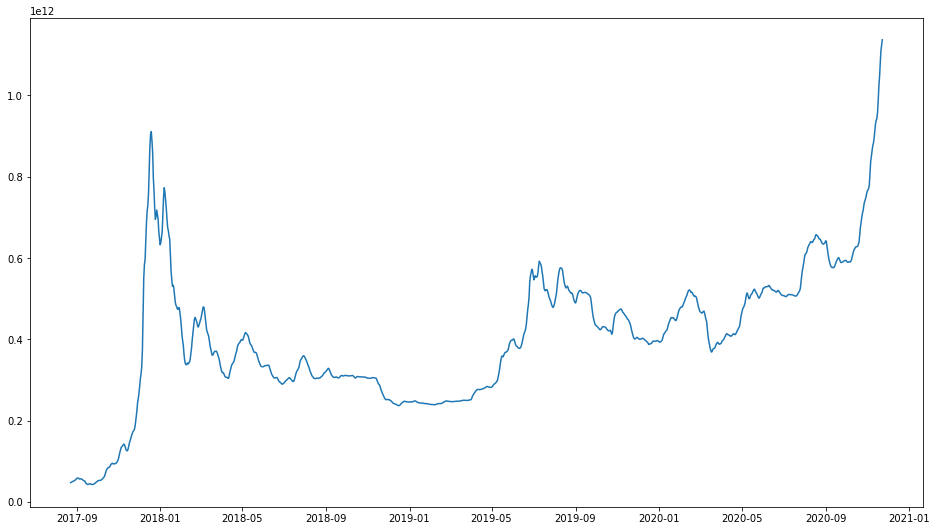

In [189]:
fig, ax1 = plt.subplots(1, 1, figsize=(16,9))
time_period = 1200
ax1.plot(df_portfolio['total'])

In [74]:
# Set the date as the dataframe index
df_xrp_main.index = DatetimeIndex(df_xrp_main['Date'])
df_btc_main.index = DatetimeIndex(df_btc_main['Date'])
df_eth_main.index = DatetimeIndex(df_eth_main['Date'])
df_btc_cash_main.index = DatetimeIndex(df_btc_cash_main['Date'])
df_link_main.index = DatetimeIndex(df_link_main['Date'])

In [75]:
# dropping original "Date" 
df_xrp_main.drop("Date",axis =1,inplace=True)
df_btc_main.drop("Date",axis =1,inplace=True)
df_eth_main.drop("Date",axis =1,inplace=True)
df_btc_cash_main.drop("Date",axis =1,inplace=True)
df_link_main.drop("Date",axis =1,inplace=True)

In [76]:
# calculating HLC for all the coins
df_xrp_main['Ripple'] = (2*df_xrp_main.High + df_xrp_main.Low + df_xrp_main.Close)/4
df_btc_main['Bitcoin'] = (2*df_btc_main.High + df_btc_main.Low + df_btc_main.Close)/4
df_eth_main['Ethereum'] = (2*df_eth_main.High + df_eth_main.Low + df_eth_main.Close)/4
df_btc_cash_main['Bitcoin_Cash'] = (2*df_btc_cash_main.High + df_btc_cash_main.Low + df_btc_cash_main.Close)/4
df_link_main['Chain_Link'] = (2*df_link_main.High + df_link_main.Low + df_link_main.Close)/4

In [77]:
join_data = [df_xrp_main["Ripple"], df_btc_main["Bitcoin"] ,df_eth_main['Ethereum'],df_btc_cash_main['Bitcoin_Cash'],df_link_main['Chain_Link']]
crypto_Df = pd.concat(join_data, axis =1)

In [78]:
crypto_Df

,Ripple,Bitcoin,Ethereum,Bitcoin_Cash,Chain_Link
Date,,,,,
2015-11-23,0.004307,323.643005,NaN,NaN,NaN
2015-11-24,0.004255,321.070007,0.923058,NaN,NaN
2015-11-25,0.004299,325.810997,0.878407,NaN,NaN
2015-11-26,0.004347,353.606743,0.873957,NaN,NaN
2015-11-27,0.004278,358.272491,0.882187,NaN,NaN
...,...,...,...,...,...
2020-11-20,0.321264,18483.390625,502.149185,255.648193,14.095437
2020-11-21,0.428131,18739.958496,538.544807,292.038734,14.980049
2020-11-22,0.460190,18354.831055,557.832581,295.106636,14.897663


In [79]:
#We include the data where all the crypto coins existed( Chain link and bitcoin cash are relatively new coins)
crypto_Df.dropna(inplace= True)

In [80]:
crypto_Df

,Ripple,Bitcoin,Ethereum,Bitcoin_Cash,Chain_Link
Date,,,,,
2017-09-20,0.183717,3956.614929,285.890747,500.643509,0.180138
2017-09-21,0.176780,3769.377441,271.703991,447.505005,0.185189
2017-09-22,0.173635,3675.192505,265.402001,422.187248,0.163430
2017-09-23,0.176688,3756.349976,279.905998,425.468003,0.143076
2017-09-24,0.176958,3735.509949,286.627747,426.591751,0.170263
...,...,...,...,...,...
2020-11-19,0.300355,17859.684571,474.394539,247.218311,13.654923
2020-11-20,0.321264,18483.390625,502.149185,255.648193,14.095437
2020-11-21,0.428131,18739.958496,538.544807,292.038734,14.980049


In [81]:
# Short Window moving average 
short_mov_avg  = crypto_Df.rolling(window=7).mean()

In [82]:
short_mov_avg.tail(10)

,Ripple,Bitcoin,Ethereum,Bitcoin_Cash,Chain_Link
Date,,,,,
2020-11-14,0.258695,15768.471924,458.820951,261.989427,12.779301
2020-11-15,0.261274,15857.651367,459.089955,259.290519,12.745559
2020-11-16,0.265581,16016.975028,460.485591,256.475555,12.733736
2020-11-17,0.271691,16319.091832,464.371471,255.600548,12.754649
2020-11-18,0.277550,16644.839774,466.859744,254.428861,12.844639
2020-11-19,0.283890,16895.468890,468.614916,252.561449,12.977946
2020-11-20,0.292262,17206.084822,473.123400,252.180340,13.162722
2020-11-21,0.314680,17581.330706,483.506272,257.002286,13.488734
2020-11-22,0.341581,17917.901472,498.560871,263.425212,13.858684


In [83]:
# long window moving average
long_mov_avg = crypto_Df.rolling(window=21).mean()
long_mov_avg.tail(10)

,Ripple,Bitcoin,Ethereum,Bitcoin_Cash,Chain_Link
Date,,,,,
2020-11-14,0.250445,14557.426979,421.974416,261.416300,11.925495
2020-11-15,0.251258,14693.090553,423.925782,260.354763,11.918125
2020-11-16,0.252686,14858.340007,426.698079,259.530889,11.944910
2020-11-17,0.254991,15043.356631,430.167721,259.086659,11.993069
2020-11-18,0.257245,15258.426677,434.234248,258.122770,12.088190
2020-11-19,0.259921,15470.292155,438.318818,257.178207,12.191611
2020-11-20,0.263791,15707.766067,443.887329,256.764516,12.330289
2020-11-21,0.272703,15941.871791,451.033441,258.140770,12.508806
2020-11-22,0.283194,16160.083345,458.837898,259.495208,12.674016


In [84]:
# plotting the simple moving averaes of different coins
def simple_moving_average(coin_name,start_date,end_date):
    start_date = crypto_Df.index.min()
    end_date = crypto_Df.index.max()
    
    
    fig, ax = plt.subplots(figsize=(16,9))
    
    ax.plot(crypto_Df.loc[start_date:end_date, :].index, crypto_Df.loc[start_date:end_date, coin_name], label='Coin_Price')
    ax.plot(long_mov_avg.loc[start_date:end_date, :].index, long_mov_avg.loc[start_date:end_date, coin_name], label = '21 days Moving Average')
    ax.plot(short_mov_avg.loc[start_date:end_date, :].index, short_mov_avg.loc[start_date:end_date, coin_name], label = '7 days Moving Average')

    ax.legend(loc='best')
    ax.set_ylabel(coin_name +' Coin Price in USD')
    
    

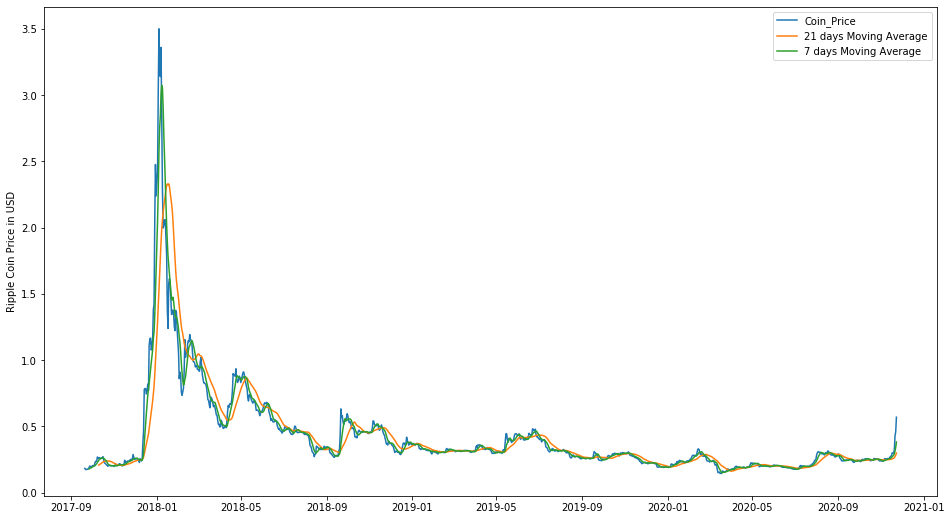

In [85]:
# Plotting Ripple Moving average
simple_moving_average(coin_name="Ripple",start_date=crypto_Df.index.min(),end_date=crypto_Df.index.min())

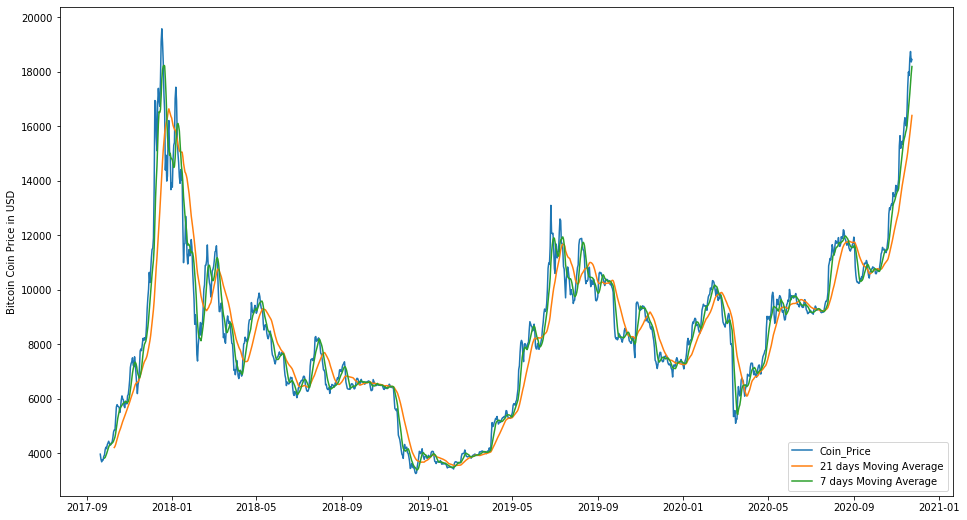

In [48]:
# Plotting Bitcoin Moving average
simple_moving_average(coin_name="Bitcoin",start_date=crypto_Df.index.min(),end_date=crypto_Df.index.min())

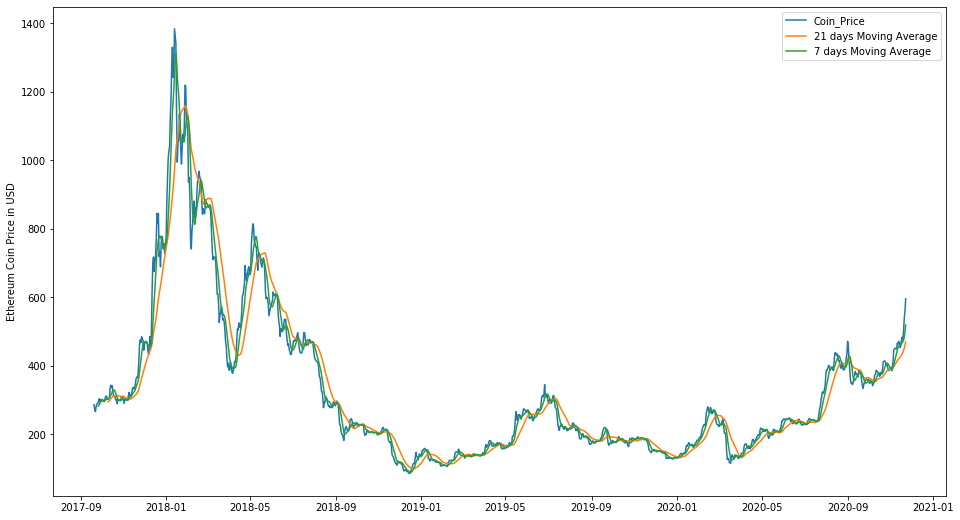

In [49]:
# Plotting Ethereum Moving average
simple_moving_average(coin_name="Ethereum",start_date=crypto_Df.index.min(),end_date=crypto_Df.index.min())

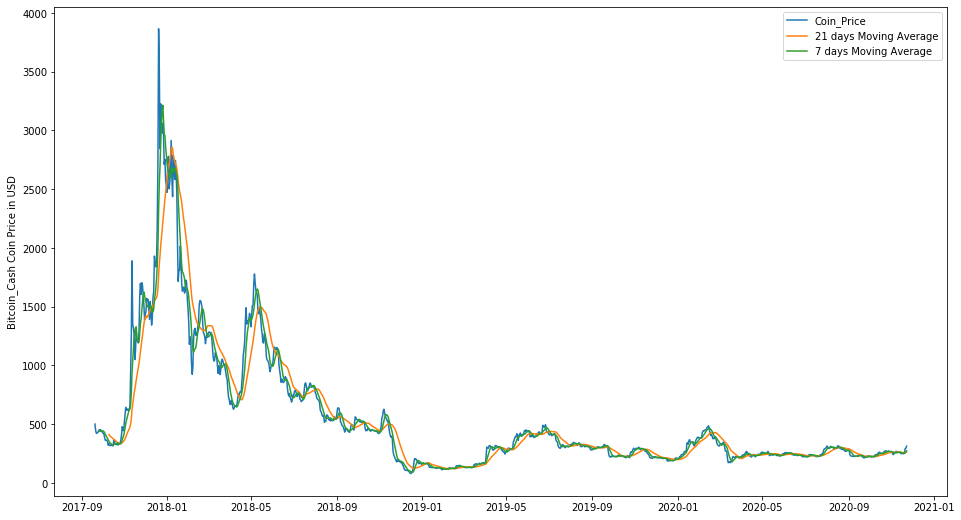

In [50]:
# Plotting Bitcoin Cash Moving average
simple_moving_average(coin_name="Bitcoin_Cash",start_date=crypto_Df.index.min(),end_date=crypto_Df.index.min())

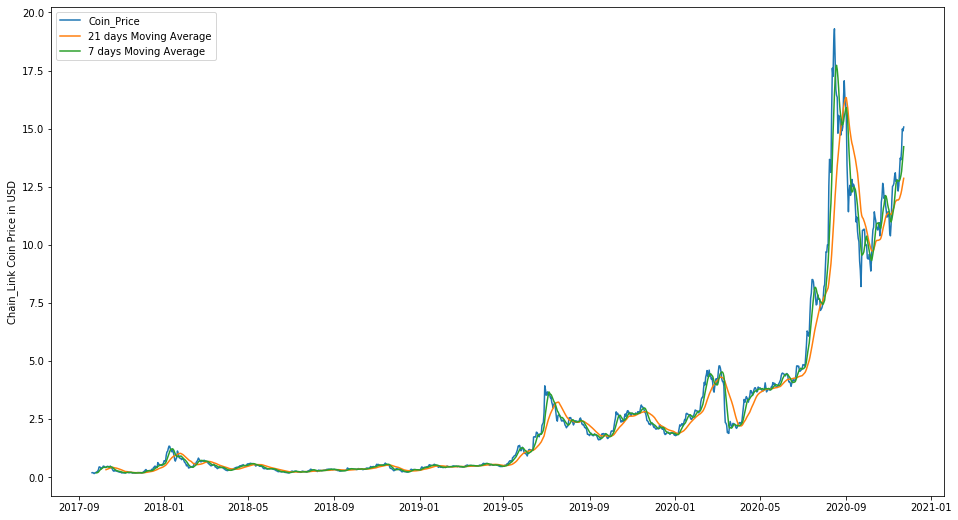

In [51]:
# Plotting Chain Link Moving average
simple_moving_average(coin_name="Chain_Link",start_date=crypto_Df.index.min(),end_date=crypto_Df.index.min())

Now we will introduce the concept of Exponential moving average becsue the simple moving average data is too noisy and it lags the data which means the changes or fluctuations in the price trend are only observed with a delay which might be detrimental for our anlysis.

In [86]:
def exponential_moving_average(coin_name,start_date, end_date):
    
    exp_mov_avg = crypto_Df.ewm(span=7, adjust=False).mean()
    start_date = crypto_Df.tail(365).index.min()
    end_date = crypto_Df.tail(365).index.max()
    
    fig, ax = plt.subplots(figsize=(15,9))

    ax.plot(crypto_Df.loc[start_date:end_date, :].index, crypto_Df.loc[start_date:end_date, coin_name], label='Coin Price')
    ax.plot(exp_mov_avg.loc[start_date:end_date, :].index, exp_mov_avg.loc[start_date:end_date, coin_name], label = '7 day exponential moving average')
    ax.plot(short_mov_avg.loc[start_date:end_date, :].index, short_mov_avg.loc[start_date:end_date, coin_name], label = '7-days Simple moving average')

    ax.legend(loc='best')
    ax.set_ylabel('Price in USD')

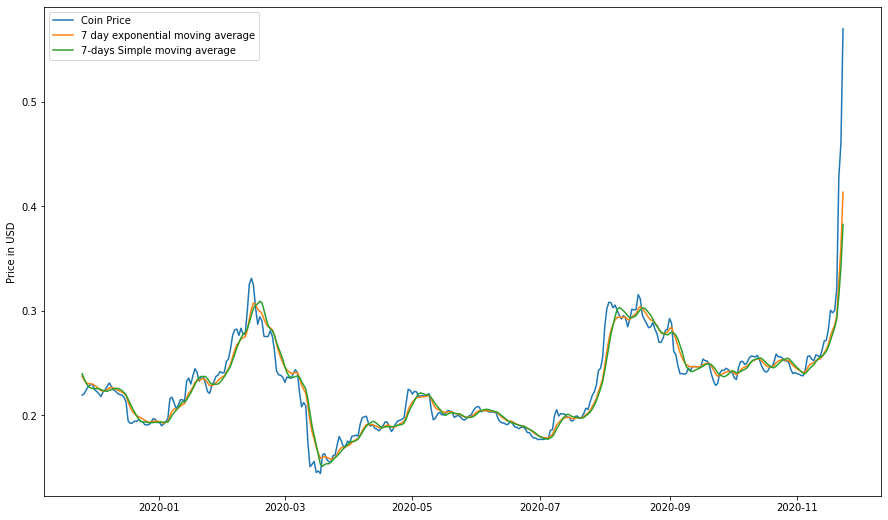

In [87]:
# Plotting Ripple Exponential Moving average
exponential_moving_average(coin_name="Ripple",start_date=crypto_Df.index.min(),end_date=crypto_Df.index.min())

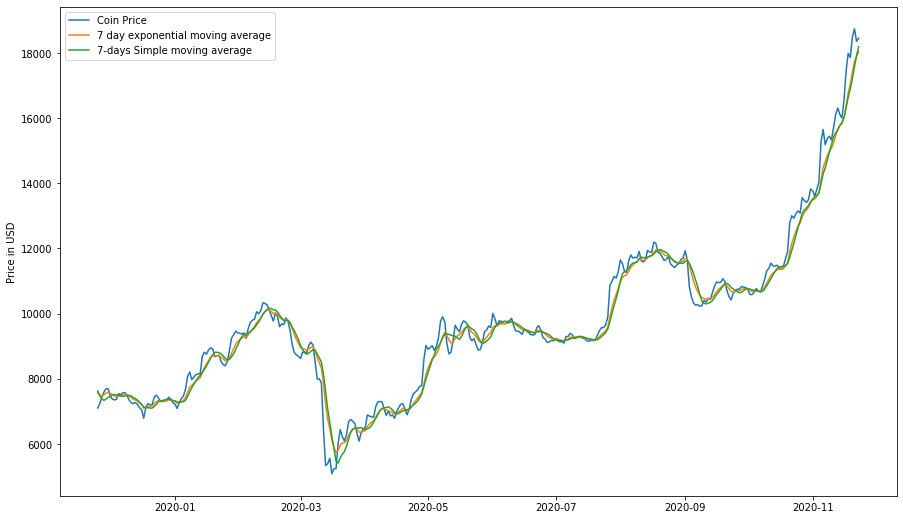

In [54]:
# Plotting Bitcoin Exponential Moving average
exponential_moving_average(coin_name="Bitcoin",start_date=crypto_Df.index.min(),end_date=crypto_Df.index.min())

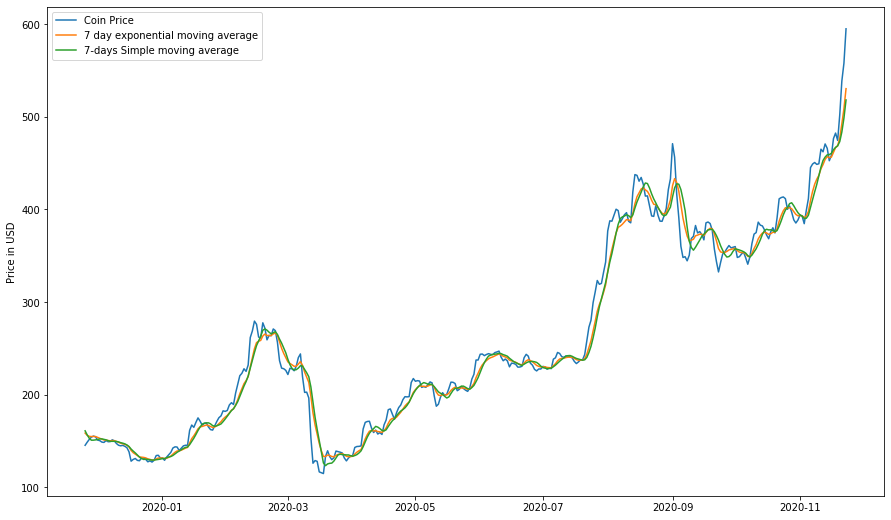

In [55]:
# Plotting Ethereum Exponential Moving average
exponential_moving_average(coin_name="Ethereum",start_date=crypto_Df.index.min(),end_date=crypto_Df.index.min())

In [88]:
# Now we have to take the difference between the actual crypto coin prices and the exponential moving average data
exp_mov_avg = crypto_Df.ewm(span=7, adjust=False).mean()
holding_positions_initial = crypto_Df - exp_mov_avg
holding_positions_initial.tail()

,Ripple,Bitcoin,Ethereum,Bitcoin_Cash,Chain_Link
Date,,,,,
2020-11-19,0.014112,813.504486,5.822898,-5.117528,0.533418
2020-11-20,0.026266,1077.907906,25.183158,2.484265,0.730449
2020-11-21,0.099850,1000.856832,46.184085,29.156104,1.211296
2020-11-22,0.098931,461.797043,49.103894,24.168005,0.846682
2020-11-23,0.156303,415.431278,64.646207,31.539801,0.761836


### Before doing an optimized Budget allocation , lets just create a portfolio by splitting our money equally between all the coins

In [89]:
holding_positions = holding_positions_initial.apply(np.sign) * 1/5
holding_positions.head()

,Ripple,Bitcoin,Ethereum,Bitcoin_Cash,Chain_Link
Date,,,,,
2017-09-20,0.0,0.0,0.0,0.0,0.0
2017-09-21,-0.2,-0.2,-0.2,-0.2,0.2
2017-09-22,-0.2,-0.2,-0.2,-0.2,-0.2
2017-09-23,-0.2,-0.2,0.2,-0.2,-0.2
2017-09-24,-0.2,-0.2,0.2,-0.2,0.2


In [90]:
holding_positions.tail()

,Ripple,Bitcoin,Ethereum,Bitcoin_Cash,Chain_Link
Date,,,,,
2020-11-19,0.2,0.2,0.2,-0.2,0.2
2020-11-20,0.2,0.2,0.2,0.2,0.2
2020-11-21,0.2,0.2,0.2,0.2,0.2
2020-11-22,0.2,0.2,0.2,0.2,0.2
2020-11-23,0.2,0.2,0.2,0.2,0.2


In [91]:
# Lets lag our data for Holding positions by 1 day
holding_positions_final = holding_positions.shift(1)

Text(0, 0.5, ' Holding position')

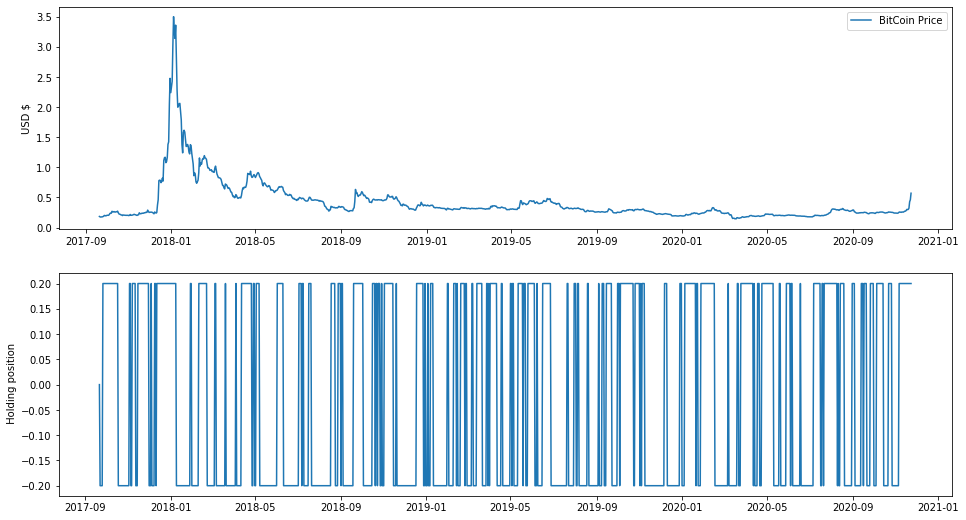

In [92]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(crypto_Df.loc[crypto_Df.index.min():crypto_Df.index.max(), :].index, crypto_Df.loc[crypto_Df.index.min():crypto_Df.index.max(), 'Ripple'], label='BitCoin Price')

ax1.set_ylabel('USD $')
ax1.legend(loc='best')

ax2.plot(holding_positions_final.loc[crypto_Df.index.min():crypto_Df.index.max(), :].index, holding_positions_final.loc[crypto_Df.index.min():crypto_Df.index.max(), 'Ripple'], 
        label=' Holding position')



ax2.set_ylabel(' Holding position')

### Log returns of our crypto Dataframe

In [93]:
# taking the differences of the log values of the crypto coin prices
crypto_log_returns = np.log(crypto_Df).diff()
crypto_log_returns.tail()

,Ripple,Bitcoin,Ethereum,Bitcoin_Cash,Chain_Link
Date,,,,,
2020-11-19,0.007364,-0.007059,-0.016587,-0.016715,-0.005182
2020-11-20,0.067300,0.034327,0.056858,0.033530,0.031751
2020-11-21,0.287166,0.013786,0.069973,0.133084,0.060868
2020-11-22,0.072209,-0.020765,0.035188,0.010450,-0.005515
2020-11-23,0.213405,0.005006,0.064374,0.058840,0.011287


In [94]:
# Now lets multiply the crypto log returns with the holding positions
final_log_returns = holding_positions_final * crypto_log_returns
final_log_returns.tail()

,Ripple,Bitcoin,Ethereum,Bitcoin_Cash,Chain_Link
Date,,,,,
2020-11-19,0.001473,-0.001412,-0.003317,0.003343,-0.001036
2020-11-20,0.013460,0.006865,0.011372,-0.006706,0.006350
2020-11-21,0.057433,0.002757,0.013995,0.026617,0.012174
2020-11-22,0.014442,-0.004153,0.007038,0.002090,-0.001103
2020-11-23,0.042681,0.001001,0.012875,0.011768,0.002257


## Cumulative log returns

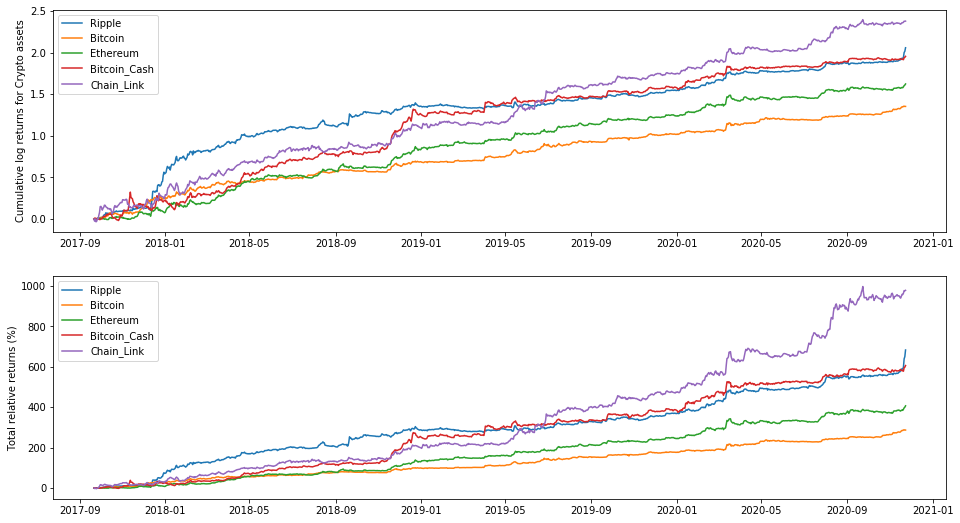

In [95]:
# cumulative log returns per each coin
cum_log_returns = final_log_returns.cumsum()

# Changing the cumulative log returns to relative returns
cum_rel_returns = np.exp(cum_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

for i in crypto_log_returns:
    ax1.plot(cum_log_returns.index, cum_log_returns[i], label=str(i))

ax1.set_ylabel('Cumulative log returns for Crypto assets')
ax1.legend(loc='best')


for p in crypto_log_returns:
    ax2.plot(cum_rel_returns.index, 100*cum_rel_returns[p], label=str(p))
ax2.set_ylabel('Total relative returns (%)')

ax2.legend(loc='best')

In [97]:
# Aggregating all of the cumulative returns from all of the coin assets
cum_rel_returns_final = cum_rel_returns.sum(axis=1)

# calculating the cumulative log returns per coin
cum_log_returns_final = cum_log_returns.sum(axis=1)

# Aproximating the log returns to relative returns
cum_rel_returns_final_approx = np.exp(cum_log_returns_final) - 1

In [101]:
def annual_crypto_asset_statitics(returns_portfolio, total_days = 365):
    total_simulated_days = returns_portfolio.shape[0]
    no_of_years = total_simulated_days / total_days

    # Final row value is our portfolio return
    final_portfolio_return = returns_portfolio[-1]
    
    # Compounding the returns
    annual_avg_return = (1 + final_portfolio_return)**(1/no_of_years) - 1

    print('Total portfolio return is --> ' + '{:5.2f}'.format(100*final_portfolio_return) + '%')
    
    print('Annual Average portfolio return is --> ' + '{:5.2f}'.format(100*annual_avg_return) + '%')



In [102]:
annual_crypto_asset_statitics(cum_rel_returns_final)

Total portfolio return is --> 2961.17%
Annual Average portfolio return is --> 193.18%
